# <a name="sentinel_cli"></a>Sentinel CLI Basics

**teaser**: Learn how to use the Sentinel CLI.

[Sentinel](https://docs.hashicorp.com/sentinel) allows customers to implement policy-as-code in the same way that Terraform implements infrastructure-as-code.

Governance and security teams can write Sentinel policies to restrict what can be done in HashiCorp's Enterprise products.

In this track, you will learn how to use the Sentinel CLI.

After doing this track, you can learn how to write and test Sentinel policies for Terraform in the **Sentinel for Terraform (v4)** track.

## Prerequisites

Install Sentinel

In [ ]:
#==> Install Sentinel
SENTINEL_VERSION=0.18.4
sudo rm -f /usr/local/bin/sentinel
wget https://releases.hashicorp.com/sentinel/${SENTINEL_VERSION}/sentinel_${SENTINEL_VERSION}_linux_amd64.zip
sudo unzip -d /usr/local/bin sentinel_${SENTINEL_VERSION}_linux_amd64.zip
rm sentinel_${SENTINEL_VERSION}_linux_amd64.zip

## The Sentinel CLI

### notes

[Sentinel](https://docs.hashicorp.com/sentinel) allows customers to implement policy-as-code in the same way that Terraform implements infrastructure-as-code.

The Sentinel Command Line Interface (CLI) allows you to apply and test Sentinel policies including those that use mocks generated from Terraform Cloud and Terraform Enterprise plans.

To learn more, see https://docs.hashicorp.com/sentinel.

If you would like to see syntax highlighting in the editor for Sentinel policies, we suggest selecting "ruby" in the language drop-down at the bottom of the editor (vs code).

After learning how to use the Sentinel CLI in the first challenge, you will run a very simple policy in the second challenge.

**assignment**:

The Sentinel Command Line Interface (CLI) allows you to apply and test Sentinel policies including those that use mocks generated from Terraform Cloud plans.

Let's start with some basic Sentinel commands.

Check the version of Sentinel running on your machine:

In [6]:
sentinel version

Sentinel v0.18.4


See the list of Sentinel CLI commands:

In [139]:
sentinel -h

Usage: sentinel [--version] [--help] <command> [<args>]

Available commands are:
    apply      Execute a policy and output the result
    fmt        Format Sentinel policy to a canonical format
    test       Test policies
    version    Prints the Sentinel runtime version



Get help for the "`sentinel apply`" command:

In [8]:
sentinel apply -h

Usage: sentinel apply [options] POLICY

  Execute the policy file specified by POLICY.

  This runs the policy and outputs whether the policy passed or failed.
  The exit code also reflects the status of the policy: 0 = pass, 1 = fail,
  2 = undefined (fail, but result was undefined), 3 = error.

  A configuration file is typically specified with -config to define the
  available imports, mock data, and global values. This is used to simulate
  a policy embedded within a host system.

Options:

  -color               Enable or disable colorized output. Enabled by
                       default if running interactively.
  
  -config FILE         Set the configuration file. Default:
                       sentinel.[hcl|json].
  
  -global 'VAR=VALUE'  Set a global value.
                       This flag can be set multiple times.

  -json                Enable JSON output. Using this mode, all other
                       output will be suppressed and the full detail
                    

- Read the output to learn about the "`apply`" command.
- Note that you can also use the "`-help`" and "`--help`" flags instead of "`-h`".

Get help for the "`sentinel test`" command:

In [9]:
sentinel test -h

Usage: sentinel test [options] [POLICY ...]

  Execute and verify behavior of policies.

  This runs the policy with a set of test case configurations and verifies
  that rules result in the expected values. Test cases are expected to be in
  "test/<policy>/*.[hcl|json]" files where "<policy>" is the name of the
  policy filename without an extension.

  You may specify a list of zero or more files or directories to search for
  policies. If nothing is specified, the current directory is searched.

Options:

  -color       Enable or disable colorized output. Enabled by default if
               running interactively.
  
  -json        Suppress normal output and output test results as a JSON
               document.

  -run=regexp  Run only tests matching the regular expression pattern.
               A '/' splits policy name and test case name.
  
  -verbose     Show tracing and log output for tests that succeed.


- Read the output to learn about the "`test`" command.

**NOTE**: The "`sentinel apply`" and "`sentinel test`" commands both evaluate a Sentinel policy, but the latter tests it against multiple test case files.

## Run Your First Sentinel Policy

**teaser**: Apply and test your first Sentinel policy.

**notes**:

The Sentinel "`apply`" command lets you evaluate Sentinel policies:
https://docs.hashicorp.com/sentinel/commands/apply

The Sentinel "`test`" command lets you test a Sentinel policy against multiple test cases:
https://docs.hashicorp.com/sentinel/commands/test

Both commands use Sentinel CLI configuration files:
https://docs.hashicorp.com/sentinel/commands/config

### Prep

Create directories to store files.

In [10]:
mkdir -p /tmp/sentinel
mkdir -p /tmp/sentinel/common-functions/tfplan-functions
mkdir -p /tmp/sentinel/common-functions/tfstate-functions

Clone the code repo. It has the solutions to the challenges in case you get stuck.

In [10]:
git clone https://github.com/hashicorp/sentinel-training-solution.git /tmp/sentinel/

Cloning into '/tmp/sentinel'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 117 (delta 31), reused 109 (delta 29), pack-reused 0
Receiving objects: 100% (117/117), 60.09 KiB | 1.62 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [13]:
cd /tmp/sentinel/sentinel-policies

**assignment**:

### Apply the Policy

Now that you are familiar with the Sentinel CLI commands, let's apply and test your first Sentinel policy.

Take a look at the "`require-even-number.sentinel`" policy.

In [14]:
cat require-even-number.sentinel

# A policy that requires an integer to be even

# A parameter that must be set to an integer.
param the_number default 1

# Print the number
print("The number is:", the_number)

# The main rule
main = rule {
  # Divide the integer by 2 and compare the remainder to 0
  the_number % 2 is 0
}


This checks that a parameter called "`the_number`" is an even integer; it's default value is `1`.

Apply the "`require-even-number.sentinel`" policy with the default value of `1`.

In [15]:
sentinel apply require-even-number.sentinel

Execution trace. The information below will show the values of all
the rules evaluated. Note that some rules may be missing if
short-circuit logic was taken.

Note that for collection types and long strings, output may be
truncated; re-run "sentinel apply" with the -json flag to see the
full contents of these values.

The trace is displayed due to a failed policy.

Fail - require-even-number.sentinel

Description:
  A policy that requires an integer to be even

Print messages:

The number is: 1

require-even-number.sentinel:10:1 - Rule "main"
  Description:
    The main rule

  Value:
    false



: 1

This will fail since `1` is an odd number.

Apply the "require-even-number.sentinel" policy with a value of 2:

In [16]:
sentinel apply -param the_number=2 require-even-number.sentinel

Pass - require-even-number.sentinel


This will pass since `2` is an even number.

Run that command again, but add `-trace` before the name of the policy to make Sentinel print more information:

In [17]:
sentinel apply -param the_number=2 -trace require-even-number.sentinel

No module changes to install

No policy changes to install

Execution trace. The information below will show the values of all
the rules evaluated. Note that some rules may be missing if
short-circuit logic was taken.

Note that for collection types and long strings, output may be
truncated; re-run "sentinel apply" with the -json flag to see the
full contents of these values.

Pass - require-even-number.sentinel

Description:
  A policy that requires an integer to be even

Print messages:

The number is: 2.000000

require-even-number.sentinel:10:1 - Rule "main"
  Description:
    The main rule

  Value:
    true



**NOTE**:
- `-trace` causes the `sentinel test` command to print output from any of the policy's `print` statements even when a test case passes.

### Test the Policy

Now, we will test the policy with the "`sentinel test`" command using test cases.
- For any policy, the test cases must be placed under the directory `test/<policy\>`
    - under the directory containing the policy where `<policy\>` is the name of the policy without the "`.sentinel`" extension.

Edit the "`fail.hcl`" test case for the "`require-even-number.sentinel`" policy.
Set the `value` for the `the_number` with any odd number.

In [20]:
cat <<-'EOF' > ./test/require-even-number/fail.hcl
param "the_number" {
     value = 5
}
test {
  rules = {
    main = false
  }
}
EOF

Edit the "`pass.hcl`" test case for the "`require-even-number.sentinel`" policy. Set the `value` for the `the_number>` with any even number.

In [21]:
cat > ./test/require-even-number/pass.hcl <<-'EOF'
param "the_number" {
     value = 6
}
test {
  rules = {
    main = true
  }
}
EOF

Test the "`require-even-number.sentinel`" policy against both test cases.

In [22]:
sentinel test -run=number -verbose

Installing test modules for test/require-even-number/fail.hcl
Installing test modules for test/require-even-number/pass.hcl

PASS - require-even-number.sentinel
  PASS - test/require-even-number/fail.hcl


    logs:
      The number is: 5.000000
    trace:
      require-even-number.sentinel:10:1 - Rule "main"
        Description:
          The main rule

        Value:
          false
  PASS - test/require-even-number/pass.hcl


    logs:
      The number is: 6.000000
    trace:
      require-even-number.sentinel:10:1 - Rule "main"
        Description:
          The main rule

        Value:
          true


Both test cases should pass and show you the numbers that were used.

> **Note**: When specifying a policy with the "`-run`" argument, you can match any portion of the policy name. Often, you will want to use something that only matches a single policy in the current directory.

Congratulations on completing the track. That was easy!
tabs:
- title: First Policy
type: code
hostname: sentinel
path: /root/sentinel/require-even-number.sentinel
- title: Test Cases
type: code
hostname: sentinel
path: /root/sentinel/test/require-even-number/
- title: Sentinel CLI

# Sentinel for Terraform (v4)

**teaser**: 
Learn how to write and test Sentinel policies for Terraform.

**description**:

[Sentinel](https://docs.hashicorp.com/sentinel) allows customers to implement policy-as-code in the same way that Terraform implements infrastructure-as-code.

Governance and security teams can write Sentinel policies to restrict what can be provisioned in Terraform Cloud and Terraform Enterprise workspaces. Sentinel allows these teams to control costs and enforce security standards.

In this track, you will write and test policies that restrict resources, data sources, and modules provisioned by Terraform in AWS, Azure, and GCP. This version of the track uses the v2 versions of the tfplan, tfstate, and tfconfig Sentinel imports.

This track is intended for use with these PowerPoint [slides](https://storage.cloud.google.com/instruqt-hashicorp-tracks/sentinel-shared/Sentinel-for-Terraform-v4.pptx) which you should download.

You should first run the [**Sentinel CLI Basics**](#sentinel_cli) track which introduces the Sentinel CLI.

We recommend starting this track when you can set aside at least 4 hours of uninterrupted time. If you find yourself running out of time or are interrupted, we recommend saving all your completed policies outside the track so that you can quickly restore them if forced to begin the track again.

## Exercise 1

**teaser**: 
Restrict Vault authentication methods.

### notes

[Sentinel](https://docs.hashicorp.com/sentinel) allows customers to implement policy-as-code in the same way that Terraform implements infrastructure-as-code.

The Sentinel Command Line Interface (CLI) allows you to apply and test Sentinel policies including those that use mocks generated from Terraform Cloud and Terraform Enterprise plans.

You should run the **Sentinel CLI Basics** track before starting this track.

We've launched the Sentinel CLI 0.18.4 on a Ubuntu VM running in GCP so that you don't need to download or install it.

If you would like to see syntax highlighting in the editor for Sentinel policies, we suggest selecting "ruby" in the language drop-down at the bottom of the editor.

In this track, you will complete and test policies that have been mostly written for you but have placeholders in angular brackets that you must replace with suitable Sentinel code. When doing this, do not keep the angular brackets, but do keep any quotes that might surround them.

Please be sure to review all the notes screens before each challenge and to open the links in them in browser tabs outside of the Instruqt UI.

The information in the notes and links will help you solve the challenges. We're intentionally giving you links instead of the actual information to simulate what you will have to do in the real world.

When someone asks you to write a Sentinel policy that makes sure all S3 buckets are encrypted, they probably won't tell you which Terraform resource provisions an S3 bucket or which of its attributes determine its encryption. You're going to have to figure these things out on your own by searching for and reading relevant documentation.

In this challenge, you will write your first Sentinel policy for Terraform.

We recommend reviewing the [restrict-ec2-instance-type.sentinel](https://github.com/hashicorp/terraform-sentinel-policies/blob/main/aws/restrict-ec2-instance-type.sentinel) policy and the following slides from the [Sentinel-for-Terraform-v4.pptx](https://storage.googleapis.com/instruqt-hashicorp-tracks/sentinel-shared/Sentinel-for-Terraform-v4.pptx) presentation at this point.

### <a name="slide106"></a>106 - Exercise 1: Restrict Vault Auth Methods
- Your task in this challenge is to complete and test a Sentinel policy that restricts the Vault authentication methods (backends) provisioned by Terraform's Vault Provider.
- The policy uses the `tfplan/v2` import and is very similar to the sample `restrict-ec2-instance-type.sentinel` policy we just reviewed.


### <a name="slide107"></a>107 - The tfplan/v2 Import

```shell
tfplan/v2
├── terraform_version (string)
├── variables
│   └── (indexed by name)
│       ├── name (string)
│       └── value (value)
├── planned_values
│   ├── outputs (tfstate/v2 outputs representation)
│   └── resources (tfstate/v2 resources representation)
├── resource_changes   <==---
│   └── (indexed by address[:deposed])
│       ├── address (string)
│       ├── module_address (string)
│       ├── mode (string)
│       ├── type (string)
│       ├── name (string)
│       ├── index (float (number) or string)
│       ├── provider_name (string)
│       ├── deposed (string)
│       └── change (change representation)
├── output_changes
│   └── (indexed by name)
│       ├── name (string)
│       └── change (change representation)
└── raw (map)
```

- The output above shows the collections of the `tfplan/v2` import.
- This is from https://www.terraform.io/docs/cloud/sentinel/import/tfplan-v2.html#import-overview.
- Note the organization of data exposed to the `tfplan/v2` import for resources under the `resource_changes` collection.
- While the v1 tfplan import organized resources in 3 layers (by type, name, and index), the v2 import has a flat map that is indexed by the full address of resources. This is one of the things that makes the v2 import easier to work with.
- For more details, see https://www.terraform.io/docs/cloud/sentinel/import/tfplan-v2.html#the-resource_changes-collection


### <a name="slide108"></a>108 - Using the tfplan/v2 Import

- The `tfplan/v2` import includes two different collections, `planned_values` and `resource_changes`
    - These can be used to evaluate the expected values of resource and data source attributes (including both arguments and exported attributes) if an `apply` were run.
- Using the `resource_changes` collection is generally preferred because it includes more information about changes being made to new or existing resources.
- This data includes:
    - the actions being performed such as "`create`", "`update`", and "`delete`"
    - the values of attributes before and after the change
    - and the `after_unknown` collection of booleans indicating if the values are computed (will not be known until after the apply).

NOTES:
- The `resource_changes` collection is generally more useful than the `planned_values` collection.
It provides more information.
- Note that the `after_unknown` collection has flags for computed values (those known after an apply)
- The `planned-values` collection gives the predicted state after the apply and uses the same data structures as the tfstate/v2 resources and outputs collections. It is structured like the `applied` key of the tfplan/v1 import.
- However, it combines current state with changes being made by the plan.



### <a name="slide109"></a>109 - Example of tfplan/v2 Resource Data (1)
- Recall the Terraform code we showed earlier that creates two instances of an "`aws_instance`" resource with name "`ubuntu`":
```go
resource "aws_instance" "ubuntu" {
    count         = 2
    ami           = "${var.ami_id}"
    instance_type = "${var.instance_type}"
}
```

### <a name="slide110"></a>110 - Example of tfplan/v2 Resource Data (2)
- A changed resource instance will appear in the tfplan/v2 import like this:
```json
resource_changes = {
    "aws_instance.ubuntu[0]": {
        "address": "aws_instance.ubuntu[0]",
        "change": {
            "after": {
                "instance_type": "t2.small",
            },
        },
        "mode": "managed",
        "name": "ubuntu",
        "type": "aws_instance",
    },
    "aws_instance.ubuntu[1]": {}
```

Don't worry if you don't know much about Vault. You'll find what you need in these URLs:
- https://registry.terraform.io/providers/hashicorp/vault/latest/docs/resources/auth_backend
- https://www.vaultproject.io/docs/auth

If you look at the links for various Vault auth methods under the second of these links, you'll see that the `vault auth enable` command always specifies the auth method type with a single lower-case string identical to or similar to the full name of the auth method. These strings are also what the Terraform Vault Provider uses when creating Vault auth methods.
  

assignment: |-
    

### Introduction

In this challenge, you will write your first Sentinel policy for Terraform.

Your task is to complete and test a Sentinel policy that restricts the Vault authentication methods (backends) provisioned by the `vault_auth_backend` resource of Terraform's Vault Provider to the following choices:

- Azure
- Kubernetes
- GitHub
- AppRole

Create the first version of "`restrict-vault-auth-methods.sentinel`" policy.

We've made things easier by writing most of the policy for you and by providing the test cases and mocks that you need to test it. The policy uses the "`find_resources`" and "`filter_attribute_not_in_list`" functions from the "`tfplan-functions.sentinel`" module in the `/root/sentinel/common-functions/tfplan-functions` directory. This module was copied from [tfplan-functions.sentinel](https://github.com/hashicorp/terraform-sentinel-policies/blob/main/common-functions/tfplan-functions/tfplan-functions.sentinel).

Note that the `import` statement uses the alias `plan` for the "`tfplan-functions`" import to keep lines that use it shorter. This also makes it clear which file the module is derived from.

At this point, we recommend you look at the tree diagram in the [Import Overview](https://www.terraform.io/docs/cloud/sentinel/import/tfplan-v2.html#import-overview) for the `tfplan/v2` import that these functions use.

Terraform and Sentinel documentation often refer to the `attributes` of resources and data sources, but these include two different things:
* The `arguments` which are the inputs to the resources and data sources and are specified in Terraform code.
* The `exported attributes` which cannot be set in the Terraform code but are instead returned by the providers that provision the resources or read the data sources.

When you search a Terraform resource or data source document for "attributes" to restrict, you will mostly be interested in its "arguments".

When referring to an attribute in the `tfplan/v2` import, you have to use the attribute's key in the `after` map of the `change` collection of a resource or data source contained in the `resource_changes` collection. In other words, a policy evaluating attribute "x" with the `tfplan/v2` import ultimately ends up using an expression like `rc.change.after.x`.

In this example, `rc` is an iterator variable defined in a `for` loop or in a `filter` or `all` expression that iterates over a collection of resources. Actual code will often use a different variable. The common functions used in this track and in the hashicorp/terraform-sentinel-policies repository hide a lot of this from you, but it is good to understand what they are doing under the covers.

At any point while solving the challenge, you can click the green "Check" button to get a hint suggesting something that you still need to do.

### Complete the Policy

Create the "`restrict-vault-auth-methods.sentinel`" policy.

In [71]:
#==> restrict-vault-auth-methods
cat > /tmp/sentinel/sentinel-policies/restrict-vault-auth-methods.sentinel <<-'EOF'
# restrict-vault-auth-methods.sentinel
# This policy restricts which Vault auth methods can be created
# Import common-functions/tfplan-functions/tfplan-functions.sentinel
# with alias "plan"
import "tfplan-functions" as plan
# Allowed Vault Auth Methods
allowed_methods = [
  "<method1>",
  "<method2>",
  "<method3>",
  "<method4>",
]
# Get all Vault auth methods
allVaultAuthMethods = plan.find_resources("<resource_type>")
# Filter to Vault auth methods with violations
# Prints warnings for all violations
violatingVaultAuthMethods = plan.filter_attribute_not_in_list(allVaultAuthMethods,
                            "<attribute>", <list>, true)
# Count violations
violations = length(violatingVaultAuthMethods["messages"])
# Main rule
main = rule {
  violations is 0
}'
EOF

You'll see several placeholders (ex `<method1>`) in angular brackets throughout the policy. You need to replace those placeholders with suitable Sentinel expressions. In this and the remaining challenges, please do **not** edit the mock files; that would be cheating!

#### allowed_methods

Replace `<method1>`, `<method2>`, `<method3>`, and `<method4>` in the `allowed_methods` list with suitable values. Be sure to check the [Vault auth method pages](https://www.vaultproject.io/docs/auth) to see what the correct values are and note that case matters.

<details><summary><b>HINT</b>:</summary>

azure, kubernetes, githubb, approle
</details>

#### resources

Next, you need to replace `<resource_type>` in the call to the "`find_resources`" method. 

The resource type is `vault_auth_backend`.

#### attributes

Next, replace `<attribute>` and `<list>` in the call to the "`filter_attribute_not_in_list`" function. You can figure out the attribute you want to restrict by reading the [auth_backend](https://registry.terraform.io/providers/hashicorp/vault/latest/docs/resources/auth_backend) documentation. The name of the list to use should be obvious.

After making all the substitutions, save the "`restrict-vault-auth-methods.sentinel`" policy by clicking the disk icon above the file.

In [72]:
cat /tmp/sentinel/sentinel-policies/restrict-vault-auth-methods.sentinel

# restrict-vault-auth-methods.sentinel
# This policy restricts which Vault auth methods can be created
# Import common-functions/tfplan-functions/tfplan-functions.sentinel
# with alias "plan"
import "tfplan-functions" as plan
# Allowed Vault Auth Methods
allowed_methods = [
  "<method1>",
  "<method2>",
  "<method3>",
  "<method4>",
]
# Get all Vault auth methods
allVaultAuthMethods = plan.find_resources("<resource_type>")
# Filter to Vault auth methods with violations
# Prints warnings for all violations
violatingVaultAuthMethods = plan.filter_attribute_not_in_list(allVaultAuthMethods,
                            "<attribute>", <list>, true)
# Count violations
violations = length(violatingVaultAuthMethods["messages"])
# Main rule
main = rule {
  violations is 0
}'


In [83]:
#==> restrict-vault-auth-methods
cat > /tmp/sentinel/sentinel-policies/restrict-vault-auth-methods.sentinel <<-'EOF'
# restrict-vault-auth-methods.sentinel
# This policy restricts which Vault auth methods can be created
# Import common-functions/tfplan-functions/tfplan-functions.sentinel
# with alias "plan"
import "tfplan-functions" as plan
# Allowed Vault Auth Methods
allowed_methods = [
  "azure",
  "kubernetes",
  "github",
  "approle",
]
# Get all Vault auth methods
allVaultAuthMethods = plan.find_resources("vault_auth_backend")
# Filter to Vault auth methods with violations
# Prints warnings for all violations
violatingVaultAuthMethods = plan.filter_attribute_not_in_list(allVaultAuthMethods,
                            "type", allowed_methods, true)
# Count violations
violations = length(violatingVaultAuthMethods["messages"])
# Main rule
main = rule {
  violations is 0
}
EOF

### Examine the Test Cases and Mocks

Now open the test cases and mock files on the "Test Cases" tab.

In [36]:
cat test/restrict-vault-auth-methods/fail.hcl

module "tfplan-functions" {
  source = "../../common-functions/tfplan-functions/tfplan-functions.sentinel"
}

mock "tfplan/v2" {
  module {
    source = "mock-tfplan-fail.sentinel"
  }
}

test {
  rules = {
    main = false
  }
}


In [35]:
cat test/restrict-vault-auth-methods/pass.hcl

module "tfplan-functions" {
  source = "../../common-functions/tfplan-functions/tfplan-functions.sentinel"
}

mock "tfplan/v2" {
  module {
    source = "mock-tfplan-pass.sentinel"
  }
}

test {
  rules = {
    main = true
  }
}


- You'll see that the "`fail.hcl`" test case refers to the "`tfplan-functions.sentinel`" module and the "`mock-tfplan-fail.sentinel`" mock file and expects the `main` rule to return `false`.
- You'll also see that the "`pass.hcl`" test case refers to the same module and the "`mock-tfplan-pass.sentinel`" mock file and expects the main rule to return `true`.

In [62]:
sed '1,/.*\"resource_changes/d' test/restrict-vault-auth-methods/mock-tfplan-pass.sentinel

		{
			"address": "vault_auth_backend.test[0]",
			"change": {
				"actions": [
					"create",
				],
				"after": {
					"description": null,
					"local":       null,
					"path":        "roger-k8s",
					"type":        "kubernetes",
				},
				"after_unknown": {
					"accessor":                  true,
					"default_lease_ttl_seconds": true,
					"id":                    true,
					"listing_visibility":    true,
					"max_lease_ttl_seconds": true,
					"tune":                  true,
				},
				"before": null,
			},
			"index":         0,
			"mode":          "managed",
			"name":          "test",
			"provider_name": "vault",
			"type":          "vault_auth_backend",
		},
		{
			"address": "vault_auth_backend.test[1]",
			"change": {
				"actions": [
					"create",
				],
				"after": {
					"description": null,
					"local":       null,
					"path":        "roger-gh",
					"type":        "github",
				},
				"after_unknown": {
					"accessor":                  true,
					"default_leas

In [43]:
sed / test/restrict-vault-auth-methods/mock-tfplan-pass.sentinel

terraform_version = "0.12.24"

planned_values = {
	"outputs": {},
	"resources": {
		"vault_auth_backend.test[0]": {
			"address":        "vault_auth_backend.test[0]",
			"depends_on":     [],
			"deposed_key":    "",
			"index":          0,
			"mode":           "managed",
			"module_address": "",
			"name":           "test",
			"provider_name":  "vault",
			"tainted":        false,
			"type":           "vault_auth_backend",
			"values": {
				"description": null,
				"local":       null,
				"path":        "roger-k8s",
				"type":        "kubernetes",
			},
		},
		"vault_auth_backend.test[1]": {
			"address":        "vault_auth_backend.test[1]",
			"depends_on":     [],
			"deposed_key":    "",
			"index":          1,
			"mode":           "managed",
			"module_address": "",
			"name":           "test",
			"provider_name":  "vault",
			"tainted":        false,
			"type":           "vault_auth_backend",
			"values": {
				"description": null,
				"local":       null,
				"path":        "

In [67]:
sed '1,/.*\"resource_changes/d' test/restrict-vault-auth-methods/mock-tfplan-fail.sentinel | grep -C 6 after

		{
			"address": "vault_auth_backend.test[0]",
			"change": {
				"actions": [
					"create",
				],
				"after": {
					"description": null,
					"local":       null,
					"path":        "roger-k8s",
					"type":        "kubernetes",
				},
				"after_unknown": {
					"accessor":                  true,
					"default_lease_ttl_seconds": true,
					"id":                    true,
					"listing_visibility":    true,
					"max_lease_ttl_seconds": true,
					"tune":                  true,
--
		{
			"address": "vault_auth_backend.test[1]",
			"change": {
				"actions": [
					"create",
				],
				"after": {
					"description": null,
					"local":       null,
					"path":        "roger-gh",
					"type":        "github",
				},
				"after_unknown": {
					"accessor":                  true,
					"default_lease_ttl_seconds": true,
					"id":                    true,
					"listing_visibility":    true,
					"max_lease_ttl_seconds": true,
					"tune":                  true,
--
		{
			"address": "

The mock files are simplified versions of mocks generated from plans of Terraform Cloud runs done against Terraform code that used the Vault provider to create some auth methods. The key data that determines whether a test case will pass or fail is in the `after` stanza of the `change` stanza of resources under the `resource_changes` collection.

The "`mock-tfplan-fail.sentinel`" mock file creates instances of the Kubernetes, GitHub, and AWS auth methods; the first two are allowed, but the third is not. The "`mock-tfplan-pass.sentinel`" mock file creates instances of the Kubernetes, GitHub, and Azure auth methods, all of which are allowed.

### Test the Policy

Finally, test your policy:

In [84]:
sentinel test -run=vault -verbose

Installing test modules for test/restrict-vault-auth-methods/fail.hcl
  - Module tfplan-functions marked for installation
Installation complete for test/restrict-vault-auth-methods/fail.hcl
Installing test modules for test/restrict-vault-auth-methods/pass.hcl
  - Module tfplan-functions marked for installation
Installation complete for test/restrict-vault-auth-methods/pass.hcl

PASS - restrict-vault-auth-methods.sentinel
  PASS - test/restrict-vault-auth-methods/fail.hcl


    logs:
      vault_auth_backend.test[2] has type with value aws that is not in the allowed list: [azure, kubernetes, github, approle]
    trace:
      restrict-vault-auth-methods.sentinel:22:1 - Rule "main"
        Description:
          Main rule

        Value:
          false
  PASS - test/restrict-vault-auth-methods/pass.hcl

    trace:
      restrict-vault-auth-methods.sentinel:22:1 - Rule "main"
        Description:
          Main rule

        Value:
          true


- Both test cases should pass with green output.
- Additionally, the "`fail.hcl`" test case should print a violation message for the `aws` auth method.
- If both test cases did not pass, or if Sentinel reported errors for specific lines of the policy, fix your policy and try testing it again until both test cases do pass.

## Exercise 2a

**teaser**: 
Restrict AWS IAM access keys (first version).

**notes**:
In this challenge, you will write the first version of a second Sentinel policy for Terraform.

We recommend reviewing the following slides from the [Sentinel-for-Terraform-v4.pptx](https://storage.googleapis.com/instruqt-hashicorp-tracks/sentinel-shared/Sentinel-for-Terraform-v4.pptx) presentation at this point.

contents: '![Slide 112](../assets/exercise-2a/slide-112.png)'
### <a name="slide112"></a>Exercise 2: Restrict AWS IAM access keys
- Your task in these challenges is to complete and test 2 versions of a Sentinel policy that requires that all AWS IAM access keys provisioned by Terraform's AWS Provider include a PGP key that starts with "keybase:".
- The policy uses the tfplan/v2 import.
- The first version calls common functions to find and filter resources.
- The second version does the filtering inside the policy itself, requiring you to use for loops, if/else conditionals, and the strings import.


- type: text
We've made things easier by writing most of the policy for you and by providing the test cases and mocks that you need to test it.

Your task is to complete and test a Sentinel policy that requires that all AWS IAM access keys provisioned by Terraform's AWS Provider include a PGP key.

- type: text
Don't worry if you don't know much about AWS. You can find the information you need in this URL: https://registry.terraform.io/providers/hashicorp/aws/latest/docs

You can use the filter link at the top of the left-hand menu on that page to search for resources that have "access". There is only one good match that also has "`key`". Click on it to see what attributes are available for it.

You'll also find the documentation for the [strings](https://docs.hashicorp.com/sentinel/imports/strings) import useful.

assignment: |-
### Introduction
In this challenge and the next, you will write a second Sentinel policy for Terraform.

Your task is to complete and test a Sentinel policy that requires that all AWS IAM access keys provisioned by Terraform's AWS Provider include a PGP key that starts with "`keybase:`". This means that a specific attribute on a specific resource of that provider must start with "`keybase:`".

You'll complete a simple version of the policy in this challenge and then complete a more complex version in the next challenge.

We've made things easier by writing most of the policy for you and by providing the test cases and mocks that you need to test it.

At any point while solving the challenge, you can click the green "Check" button to get a hint suggesting something that you still need to do.

### Complete the First Version

There is a policy called "`require-access-keys-use-pgp-a.sentinel`".

Open the policy.

```bash
cat > /root/sentinel/require-access-keys-use-pgp-a.sentinel  <<-'EOF'
 # require-access-keys-use-pgp-a.sentinel
 # This policy requires AWS IAM access keys to use PGP keys
 # Import common-functions/tfplan-functions/tfplan-functions.sentinel
 # with alias "plan"
import "tfplan-functions" as plan
 # Get all AWS IAM access keys
allIAMAccessKeys = plan.find_resources("<resource_type>")

 # Filter to AWS IAM access keys with violations
 # The called function prints warnings for all violations
violatingIAMAccessKeys = plan.filter_attribute_does_not_have_prefix(
                         allIAMAccessKeys, "<attribute>", "keybase:", true)
 # Count violations
violations = length(violatingIAMAccessKeys["messages"])
 # Main rule
main = rule {
  <condition>
}
EOF
```

This Sentinel policy can be divided into x sections.

1. The `import` statement imports the mock data, defined in `fail-invalid-value.hcl`, `fail-missing-value.hcl`, and `fail-with-null.hcl`.
1. The 

You'll see several placeholders in angular brackets throughout the policy. You need to replace those placeholders with suitable Sentinel expressions.

1. In the "`require-access-keys-use-pgp-a.sentinel`" policy.
1. Replace `<resource_type>` in the call to the `find_resources` function with a suitable resource type from the AWS provider
    * `aws_iam_access_key`
    
1. You can find the information you need in this URL: https://registry.terraform.io/providers/hashicorp/aws/latest/docs
    - Use the filter link at the top of the left-hand menu on that page to search for resources that have "`iam access`".
    - There is only one good match that also has "`key`".
    - Click on it to see what attributes are available for it.

1. Determine the specific attribute that is used to set a PGP key on an AWS IAM access key:
    - `pgp_key`
    - Replace `<attribute>` with that attribute in the call to the "`filter_attribute_does_not_have_prefix`" function

The "`filter_attribute_does_not_have_prefix`" function in the "`tfplan-functions.sentinel`" module does the following things:
* Iterates over all resources in the list passed to it.
* Calls the `evaluate_attribute` function to evaluate the value of the specified attribute for the current resource and uses the `else null` expression to convert the `undefined` value into `null` to cover the case that the resource did not have the attribute defined.
* Checks if the value is `null`.
* Uses the boolean expression `not strings.has_prefix(v, prefix)` to determine if the attribute does not start with the prefix (which in our case is "keybase:").
* Adds violating resources to the `violators` map and corresponding violation messages to the `messages` map.
* If `prtmsg` is `true`, prints warning messages for violators.
* Returns a map with the `violators` and `messages` maps and their common length.

Understanding this code will help you complete the "`require-access-keys-use-pgp-b.sentinel`" policy in the next challenge after you successfully complete and test the "`require-access-keys-use-pgp-a.sentinel`" policy.

5. You now need to replace `<condition>` in the `main` rule with a condition that will make the rule return `true` when there are no violations.
    - You have already seen the condition in the slides and in exercise 1.

In [118]:
#==> back up file if desired
FILE=require-access-keys-use-pgp-a.sentinel
if [ ! -f "${FILE}.orig" ] ; then
    mv $FILE ${FILE}.orig
else
    echo do nothing
fi

do nothing


#### Completed Version

In [129]:
cat > require-access-keys-use-pgp-a.sentinel <<-'EOF'
# require-access-keys-use-pgp-a.sentinel
# This policy requires AWS IAM access keys to use PGP keys
# Import common-functions/tfplan-functions/tfplan-functions.sentinel
# with alias "plan"
import "tfplan-functions" as plan
# Get all AWS IAM access keys
allIAMAccessKeys = plan.find_resources("aws_iam_access_key")
# Filter to AWS IAM access keys with violations
# The called function prints warnings for all violations
violatingIAMAccessKeys = plan.filter_attribute_does_not_have_prefix(
                         allIAMAccessKeys, "pgp_key", "keybase:", true)
# Count violations
violations = length(violatingIAMAccessKeys["messages"])
# Main rule
main = rule {
  violations is 0
}
EOF

### Examine the Test Cases and Mocks

Open the test cases and mock files on the "Test Cases" tab.

In [124]:
ls -l test/require-access-keys-use-pgp-a/

total 32
-rw-rw-r-- 1 pephan pephan  244 May 17 08:53 fail-invalid-value.hcl
-rw-rw-r-- 1 pephan pephan  244 May 17 08:53 fail-missing-value.hcl
-rw-rw-r-- 1 pephan pephan  240 May 17 08:53 fail-with-null.hcl
-rw-rw-r-- 1 pephan pephan 2747 May 17 08:53 mock-tfplan-fail-invalid-value.sentinel
-rw-rw-r-- 1 pephan pephan 2717 May 17 08:53 mock-tfplan-fail-missing-value.sentinel
-rw-rw-r-- 1 pephan pephan 2735 May 17 08:53 mock-tfplan-fail-with-null.sentinel
-rw-rw-r-- 1 pephan pephan 2851 May 17 08:53 mock-tfplan-pass.sentinel
-rw-rw-r-- 1 pephan pephan  229 May 17 08:53 pass.hcl


You'll see that we've actually included 3 fail test cases with 3 corresponding mock files. Using multiple fail test cases allows us to test multiple ways in which a policy could fail. In this case, we're testing the attribute of interest to see if it is `null`, missing, or has an invalid value that does not start with "keybase:". All 3 fail test cases expect the main rule to return `false`. Of course, we've also included a pass test case and a corresponding mock file that does include the desired attribute with an allowed value. The pass test case expects the main rule to return `true`.

The mock files are simplified versions of mocks generated from plans of Terraform Cloud runs done against Terraform code that used the AWS provider to create an AWS IAM access key.

### Test the First Version

Now, you should test your policy with this command:

In [130]:
sentinel test -run=pgp-a.sentinel -verbose

Installing test modules for test/require-access-keys-use-pgp-a/fail-invalid-value.hcl
  - Module tfplan-functions marked for installation
Installation complete for test/require-access-keys-use-pgp-a/fail-invalid-value.hcl
Installing test modules for test/require-access-keys-use-pgp-a/fail-missing-value.hcl
  - Module tfplan-functions marked for installation
Installation complete for test/require-access-keys-use-pgp-a/fail-missing-value.hcl
Installing test modules for test/require-access-keys-use-pgp-a/fail-with-null.hcl
  - Module tfplan-functions marked for installation
Installation complete for test/require-access-keys-use-pgp-a/fail-with-null.hcl
Installing test modules for test/require-access-keys-use-pgp-a/pass.hcl
  - Module tfplan-functions marked for installation
Installation complete for test/require-access-keys-use-pgp-a/pass.hcl

PASS - require-access-keys-use-pgp-a.sentinel
  PASS - test/require-access-keys-use-pgp-a/fail-invalid-value.hcl


    logs:
      aws_iam_access_k

Setting the `-run` argument to "`pgp-a.sentinel`" will only match the desired policy and avoid running any other policies. All 4 test cases should pass with green output. Additionally, the 3 fail test cases should print violation messages.

If that is not the case, you will need to edit the "`require-access-keys-use-pgp-a.sentinel`" policy and test the policy again until all 4 test cases pass.

In the next challenge, you'll complete a more complex version of the policy.

## Exercise 2b

**teaser:**
Restrict AWS IAM access keys (second version).

assignment: |-
### Introduction
In this challenge, you will write a second version of the second Sentinel policy for Terraform.

We've made things easier by writing most of the policy for you and by providing the test cases and mocks that you need to test it.

Your task is to complete and test a Sentinel policy that requires that all AWS IAM access keys provisioned by Terraform's AWS Provider include a PGP key.

At any point while solving the challenge, you can click the green "Check" button to get a hint suggesting something that you still need to do.

### Complete the Second Version
Completing the "`require-access-keys-use-pgp-a.sentinel`" policy should have been fairly easy since it had the same structure as the "`restrict-ec2-instance-type.sentinel`" and "`restrict-vault-auth-methods.sentinel`" policies. Almost all the exercises in this track could be solved with short policies that call functions that we have already defined. However, if you only called those functions, you would not learn how to write similar functions yourself.

So, we would like you to pretend that the generic "`filter_attribute_does_not_have_prefix`" function did not exist and write your own Sentinel code to handle the specific needs of the exercise. Accordingly, please open the "`require-access-keys-use-pgp-b.sentinel`" policy and observe that it also has several placeholders in angular brackets that need to be replaced.

In [133]:
#==> back up file if desired
FILE=require-access-keys-use-pgp-b.sentinel
if [ ! -f "${FILE}.orig" ] ; then
    mv $FILE ${FILE}.orig
else
    echo Backup of $FILE already exists.
fi

cat > require-access-keys-use-pgp-b.sentinel  <<-'EOF'
# require-access-keys-use-pgp-b.sentinel
# This policy requires AWS IAM access keys to use PGP keys
# Import common-functions/tfplan-functions/tfplan-functions.sentinel
# with alias "plan"
import "tfplan-functions" as plan
# Standard strings import
import "strings"
# Get all AWS IAM access keys
allIAMAccessKeys = plan.find_resources("aws_iam_access_key")
# Filter to AWS IAM access keys with violations
violatingIAMAccessKeys = {}
for allIAMAccessKeys as address, key {
  # Set the pgp_key variable, but set to null if undefined
  pgp_key = key.change.after.pgp_key <expression>
  # First, check if pgp_key is missing or null
  # Second, check if pgp_key does not start with "keybase:"
  # Add violators to violatingIAMAccessKeys and print warnings
  if <condition_1> {
    violatingIAMAccessKeys[address] = key
    print(address, "does not have the pgp_key attribute set")
  } else if <condition_2> {
    violatingIAMAccessKeys[address] = key
    print(address, "has attribute pgp_key with value", pgp_key,
          "that does not start with 'keybase:'")
  }
}
# Count violations
violations = length(violatingIAMAccessKeys)
# Main rule
main = rule {
  violations is 0
}
EOF

Backup of require-access-keys-use-pgp-b.sentinel already exists.


1. First, in the assignment of the `pgp_key` variable

    1. Replace `<expression>` with Sentinel code that will convert `key.change.after.pgp_key` to `null` if it is missing.
    
        ```diff
        -  pgp_key = key.change.after.pgp_key <expression>
        +  pgp_key = key.change.after.pgp_key else null
        ```

1. Then replace `<condition_1>` with a condition that tests if the `pgp_key` attribute was null.

    1. This condition should use the `pgp_key` variable.
    
        ```diff
        -  if <condition_1> {
        +  if pgp_key is null {
        ```
        
        - We're only testing if it was `null`. If it had been missing (`undefined`), then it would already have been converted to `null`.)



1. Next, replace `<condition_2>` with a condition that tests if the `pgp_key` variable does **not** start with "`keybase:`".
    
    ```diff
    -  if <condition_2> {
    +  if pgp_key is null {
    ```
        
    1. While there are several ways of doing this, please use the "strings" import which is also used in the "`filter_attribute_does_not_have_prefix`" function that was used by the "`require-access-keys-use-pgp-a.sentinel`" policy.

> **Note**: This version of the policy sets `violations` to `length(violatingIAMAccessKeys)` instead of `violatingIAMAccessKeys["length"]` since `violatingIAMAccessKeys` is just a regular map without a key called `length` as had been the case when it was returned by the filter function.

After making all of the above substitutions, save the "`require-access-keys-use-pgp-b.sentinel" policy.`

#### Completed version

In [134]:
cat > require-access-keys-use-pgp-b.sentinel  <<-'EOF'
# require-access-keys-use-pgp-b.sentinel
# This policy requires AWS IAM access keys to use PGP keys
# Import common-functions/tfplan-functions/tfplan-functions.sentinel
# with alias "plan"
import "tfplan-functions" as plan
# Standard strings import
import "strings"
# Get all AWS IAM access keys
allIAMAccessKeys = plan.find_resources("aws_iam_access_key")
# Filter to AWS IAM access keys with violations
violatingIAMAccessKeys = {}
for allIAMAccessKeys as address, key {
  # Set the pgp_key variable, but set to null if undefined
  pgp_key = key.change.after.pgp_key else null
  # First, check if pgp_key is missing or null
  # Second, check if pgp_key does not start with "keybase:"
  # Add violators to violatingIAMAccessKeys and print warnings
  if pgp_key is null {
    violatingIAMAccessKeys[address] = key
    print(address, "does not have the pgp_key attribute set")
  } else if not strings.has_prefix(pgp_key, "keybase:") {
    violatingIAMAccessKeys[address] = key
    print(address, "has attribute pgp_key with value", pgp_key,
          "that does not start with 'keybase:'")
  }
}
# Count violations
violations = length(violatingIAMAccessKeys)
# Main rule
main = rule {
  violations is 0
}
EOF

### Test the Second Version

Finally, test your policy:

In [135]:
sentinel test -run=pgp-b.sentinel -verbose

Installing test modules for test/require-access-keys-use-pgp-b/fail-invalid-value.hcl
  - Module tfplan-functions marked for installation
Installation complete for test/require-access-keys-use-pgp-b/fail-invalid-value.hcl
Installing test modules for test/require-access-keys-use-pgp-b/fail-missing-value.hcl
  - Module tfplan-functions marked for installation
Installation complete for test/require-access-keys-use-pgp-b/fail-missing-value.hcl
Installing test modules for test/require-access-keys-use-pgp-b/fail-with-null.hcl
  - Module tfplan-functions marked for installation
Installation complete for test/require-access-keys-use-pgp-b/fail-with-null.hcl
Installing test modules for test/require-access-keys-use-pgp-b/pass.hcl
  - Module tfplan-functions marked for installation
Installation complete for test/require-access-keys-use-pgp-b/pass.hcl

PASS - require-access-keys-use-pgp-b.sentinel
  PASS - test/require-access-keys-use-pgp-b/fail-invalid-value.hcl


    logs:
      aws_iam_access_k

All 4 test cases should pass with green output. Additionally, the 3 fail test cases should print violation messages.

If that is not the case, you will need to edit the "`require-access-keys-use-pgp-b.sentinel`" policy and test the policy again until all 4 test cases pass.

## Exercise 3a

**teaser**:
Restrict domains of AWS Certificate Manager (ACM) Certificates (first version).

**notes**:

In this challenge, you will write a third Sentinel policy for Terraform.

We recommend reviewing the following slides from the [`Sentinel-for-Terraform-v4.pptx`](https://storage.googleapis.com/instruqt-hashicorp-tracks/sentinel-shared/Sentinel-for-Terraform-v4.pptx) presentation.

### <a name="slide114"></a>114 - Exercise 3: Restrict AWS ACM Certificates

- Your task in these challenges is to complete and test two versions of a Sentinel policy that requires that all AWS Certificate Manager (ACM) Certificates referenced by a data source in Terraform's AWS Provider have domains that are subdomains of "`hashidemos.io`".
- Since we are restricting a data source, the policy uses the `tfstate/v2` import instead of the `tfplan/v2` import that we have used in previous policies.
- It also uses the `matches` operator.
- The first version of the policy uses filters both to find an initial list of resources and to find those that violate the policy.
- The second version of the policy has you write your own validation function.

### <a name="slide115"></a>115 - tfstate/v2 Import

```shell
(tfstate/v2)
├── terraform_version (string)
├── resources
│   └── (indexed by address)
│       ├── address (string)
│       ├── module_address (string)
│       ├── mode (string)
│       ├── type (string)
│       ├── name (string)
│       ├── index (float (number) or string)
│       ├── provider_name (string)
│       ├── values (map)
│       ├── depends_on (list of strings)
│       ├── tainted (boolean)
│       └── deposed_key (string)
└── outputs
    └── (indexed by name)
        ├── name (string)
        ├── sensitive (boolean)
        └── value (value)
```

This example shows the collections of the [`tfstate/v2`](https://www.terraform.io/docs/cloud/sentinel/import/tfstate-v2.html#import-overview) import.

- While the v1 tfstate import organized resources in 3 layers (by `type`, `name`, and `index`), the v2 import has a flat map that is indexed by the full address of resources. This is one of the things that makes the v2 import easier to work with.
    - For more details, see https://www.terraform.io/docs/cloud/sentinel/import/tfstate-v2.html#the-resources-collection
- The `planned_values` collection of the `tfplan/v2` import has similar data, but includes predictions of what the state will look like after the apply since it combines current state with the current plan.
- The `tfstate/v2` import only shows data actually in the state after the plan.
    - Note that this can include new state for data sources that were evaluated during the refresh operation done by the plan.
    - This occurs if the data source does not reference any computed values.
    - Otherwise, evaluation of the data source is delayed until the apply.


contents: '![Slide 116](../assets/exercise-3a/slide-116.png)'

### <a name="slide116"></a>116 - Using the tfstate/v2 Import

- The `tfstate/v2` import gives the state of resources and data sources after a plan.
- Generally, this will be the same as the state before the plan, but it could include additional data for data sources that were evaluated during the refresh operation done by the plan.
- Data sources that do not reference computed values are evaluated during the plan.
- Data sources that reference computed values are not evaluated until the apply.
    - As a consequence, the tfstate/v2 import is often more useful than the tfplan/v2 import when restricting data sources in policies.

- type: text
We've made things easier by writing most of the policy for you and by
providing the test cases and mocks that you need to test it.

Your task is to complete and test a Sentinel policy that requires that all AWS Certificate Manager (ACM) Certificates referenced by a data source in Terraform's AWS Provider have domains that are subdomains of "`hashidemos.io`". (This means the domains must end in "`.hashidemos.io`".)



assignment: |-
### Introduction

In this challenge, you will write a third Sentinel policy for Terraform.

Your task is to complete and test a Sentinel policy that requires that all AWS Certificate Manager (ACM) Certificates referenced by a data source in Terraform's AWS Provider have domains that are subdomains of "`hashidemos.io`".

You'll complete a simple version of the policy in this challenge and then complete a more complex version in the next challenge.

We've made things easier by writing most of the policy for you and by providing the test cases and mocks that you need to test it.

Create the first version of "`restrict-acm-certificate-domains-a.sentinel`" policy.

In [147]:
#==> back up file if desired
FILE=restrict-acm-certificate-domains-a.sentinel
if [ ! -f "${FILE}.orig" ] ; then
    mv $FILE ${FILE}.orig
else
    echo "#==> Backup of $FILE already exists."
fi

cat > restrict-acm-certificate-domains-a.sentinel <<-'EOF'
# restrict-acm-certificate-domains-a.sentinel
# This policy uses the tfstate import to restrict ACM certificates
# to have domains that are sub-domains of hashidemos.io
# Import common-functions/tfstate-functions/tfstate-functions.sentinel
# with alias "state"
import "tfstate-functions" as state
# Get all AWS ACM certs
allACMCerts = state.find_datasources("<data_source_type>")
# Filter to ACM certs that are not sub-domains of hashidemos.io
violatingACMCerts = filter allACMCerts as address, cert {
  cert.values.<attribute> else "" not matches "(.+)\\.hashidemos\\.io$" and
  print(address, "has domain", <expression>,
        "that is not a sub-domain of hashidemos.io")
}
# Count violations
violations = length(violatingACMCerts)
# Main rule that evaluates the result of the validation function
main = rule {
  violations is 0
}
EOF

Backup of restrict-acm-certificate-domains-a.sentinel already exists.


- The policy uses the "`find_datasources`" function from the "`tfstate-functions.sentinel`" module
    - In the `/sentinel/common-functions/tfstate-functions` directory.
    - This module was copied from [tfstate-functions.sentinel](https://github.com/hashicorp/terraform-sentinel-policies/blob/main/common-functions/tfstate-functions/tfstate-functions.sentinel).

In [151]:
ls -l common-functions/tfstate-functions/tfstate-functions.sentinel

-rw-rw-r-- 1 pephan pephan 27119 May 17 08:53 common-functions/tfstate-functions/tfstate-functions.sentinel


Note that the `import` statement uses the alias `state` for the "`tfstate-functions`" import to keep lines that use it shorter. This also makes it clear which file the module is derived from.

At this point, we recommend you look at the tree diagram in the [Import Overview](https://www.terraform.io/docs/cloud/sentinel/import/tfstate-v2.html#import-overview) for the `tfstate/v2` import.

When referring to an attribute in the `tfstate/v2` import, you have to use the attribute's key in the `values` map of a resource or data source contained in the import's `resources` collection. So, a policy evaluating attribute "x" with the `tfstate/v2` import ultimately ends up using an expression like `r.values.x`. (Recall that the `tfplan/v2` import uses an expression like `rc.change.after.x`.)

In this example, `r` is an iterator variable defined in a `for` loop or in a `filter` or `all` expression that iterates over a collection of resources. Actual code will often use a different variable. Of course, the common functions used in this track and in the hashicorp/terraform-sentinel-policies repository hide a lot of this from you, but it is good to understand what they are doing under the covers.

At any point while solving the challenge, you can click the green "Check" button to get a hint suggesting something that you still need to do.

### Complete the First Version

Make the following modifications:

- You'll see several placeholders in angular brackets throughout the policy.
- You need to replace those placeholders with suitable Sentinel expressions.
- Replace `<data_source_type>` in the call made to the `find_datasources` function with a suitable data source type from the AWS provider.
    - Find the documentation page for the "data source" you are restricting
    - You can look at the [AWS Provider](https://registry.terraform.io/providers/hashicorp/aws/latest/docs) documentation to search for the relevant data source.
        - Use the filter link at the top of the left-hand menu on that page to search for a data source that has "`acm`".
- Click on it to see what attributes are available for it.
    - You can determine the specific attribute that is used to set the domain on an ACM certificate.
    - Please replace `<attribute>` with that attribute.
- Next, replace `<expression>` with a suitable expression representing the value of the domain.
- By this point, the right expression should already be in your policy.
- You might also find the documentation for the Sentinel [matches](https://docs.hashicorp.com/sentinel/language/spec/#matches-operator) operator useful.


#### Completed version

In [159]:
cat restrict-acm-certificate-domains-a.sentinel.orig

# This policy uses the tfstate import to restrict ACM certificates
# to have domains that are sub-domains of hashidemos.io

# Import common-functions/tfstate-functions/tfstate-functions.sentinel
# with alias "state"
import "tfstate-functions" as state

# Get all AWS ACM certs
allACMCerts = state.find_datasources("aws_acm_certificate")

# Filter to ACM certs that are not sub-domains of hashidemos.io
violatingACMCerts = filter allACMCerts as address, cert {
  cert.values.domain else "" not matches "(.+)\\.hashidemos\\.io$" and
  print(address, "has domain", cert.values.domain,
        "that is not a sub-domain of hashidemos.io")
}

# Count violations
violations = length(violatingACMCerts)

# Main rule that evaluates the result of the validation function
main = rule {
  violations is 0
}


In [167]:
cat > restrict-acm-certificate-domains-a.sentinel <<-'EOF'
# restrict-acm-certificate-domains-a.sentinel
# This policy uses the tfstate import to restrict ACM certificates
# to have domains that are sub-domains of hashidemos.io
# Import common-functions/tfstate-functions/tfstate-functions.sentinel
# with alias "state"
import "tfstate-functions" as state
# Get all AWS ACM certs
allACMCerts = state.find_datasources("<data_source_type>")
# Filter to ACM certs that are not sub-domains of hashidemos.io
violatingACMCerts = filter allACMCerts as address, cert {
  cert.values.<attribute> else "" not matches "(.+)\\.hashidemos\\.io$" and
  print(address, "has domain", <expression>,
        "that is not a sub-domain of hashidemos.io")
}
# Count violations
violations = length(violatingACMCerts)
# Main rule that evaluates the result of the validation function
main = rule {
  violations is 0
}
EOF

### Examine the Test Cases and Mocks

Open the test cases and mock files.

In [169]:
printf "\n#==> Test cases - Fail\n"
cat test/restrict-acm-certificate-domains-a/fail.hcl
printf "\n#==> Test cases - Pass\n"
cat test/restrict-acm-certificate-domains-a/pass.hcl


#==> Test cases - Fail
module "tfstate-functions" {
  source = "../../common-functions/tfstate-functions/tfstate-functions.sentinel"
}

mock "tfstate/v2" {
  module {
    source = "mock-tfstate-fail.sentinel"
  }
}

test {
  rules = {
    main = false
  }
}

#==> Test cases - Pass
module "tfstate-functions" {
  source = "../../common-functions/tfstate-functions/tfstate-functions.sentinel"
}

mock "tfstate/v2" {
  module {
    source = "mock-tfstate-pass.sentinel"
  }
}

test {
  rules = {
    main =  true
  }
}


In [164]:
printf "\n#==> Mock files - Fail\n"
cat test/restrict-acm-certificate-domains-a/mock-tfstate-fail.sentinel
printf "\n#==> Mock files - Pass\n"
cat test/restrict-acm-certificate-domains-a/mock-tfstate-pass.sentinel

#
==> Mock files - Fail
terraform_version = "0.12.3"

outputs = {}

resources = {
	"aws_acm_certificate.cert_1": {
		"address":        "aws_acm_certificate.cert_1",
		"depends_on":     [],
		"deposed_key":    "",
		"index":          null,
		"mode":           "data",
		"module_address": "",
		"name":           "cert_1",
		"provider_name":  "aws",
		"tainted":        false,
		"type":           "aws_acm_certificate",
		"values": {
			"arn":         "arn:aws:acm:us-east-1:753646501470:certificate/1f485f70-2bc1-4ae3-a30f-a533605e99b9",
			"domain":      "cam-vault.hashydemos.io",
			"id":          "2020-03-25 16:37:53.939547607 +0000 UTC",
			"key_types":   null,
			"most_recent": false,
			"statuses":    null,
			"types":       null,
		},
	},
	"aws_acm_certificate.cert_2": {
		"address":        "aws_acm_certificate.cert_2",
		"depends_on":     [],
		"deposed_key":    "",
		"index":          null,
		"mode":           "data",
		"module_address": "",
		"name":           "cert_2",
		"provider_

- The "`fail.hcl`" test case refers to:
    - the "`tfstate-functions.sentinel`" module and
    - the "`mock-tfstate-fail.sentinel`" mock file and
    - expects the main rule to return `false`

- The "`pass.hcl`" test case refers to:
    - the "`tfstate-functions.sentinel`" module and
    - the "`mock-tfstate-pass.sentinel`" mock file and
    - expects the main rule to return `true`

> The mock files are simplified versions of mocks generated from plans of Terraform Cloud runs done against Terraform code that used the AWS provider to retrieve information from two AWS ACM certificates.

### Test the First Version

Test your policy with this command:

In [168]:
sentinel test -run=domains-a.sentinel -verbose

Installing test modules for test/restrict-acm-certificate-domains-a/fail.hcl
  - Module tfstate-functions marked for installation
Installation complete for test/restrict-acm-certificate-domains-a/fail.hcl
Installing test modules for test/restrict-acm-certificate-domains-a/pass.hcl
  - Module tfstate-functions marked for installation
Installation complete for test/restrict-acm-certificate-domains-a/pass.hcl

PASS - restrict-acm-certificate-domains-a.sentinel
  PASS - test/restrict-acm-certificate-domains-a/fail.hcl


    logs:
      aws_acm_certificate.cert_1 has domain cam-vault.hashydemos.io that is not a sub-domain of hashidemos.io
      aws_acm_certificate.cert_2 has domain roger-ptfe.hashydemos.io that is not a sub-domain of hashidemos.io
    trace:
      restrict-acm-certificate-domains-a.sentinel:18:1 - Rule "main"
        Description:
          Main rule that evaluates the result of the validation function

        Value:
          false
  PASS - test/restrict-acm-certificate-do

<details><summary><b>Expected Output</b></summary>

```text
PASS - restrict-acm-certificate-domains-a.sentinel
  PASS - test/restrict-acm-certificate-domains-a/fail.hcl


    logs:
      aws_acm_certificate.cert_1 has domain cam-vault.hashydemos.io that is not a sub-domain of hashidemos.io
      aws_acm_certificate.cert_2 has domain roger-ptfe.hashydemos.io that is not a sub-domain of hashidemos.io
    trace:
      restrict-acm-certificate-domains-a.sentinel:18:1 - Rule "main"
        Description:
          Main rule that evaluates the result of the validation function

        Value:
          false
  PASS - test/restrict-acm-certificate-domains-a/pass.hcl

    trace:
      restrict-acm-certificate-domains-a.sentinel:18:1 - Rule "main"
        Description:
          Main rule that evaluates the result of the validation function

        Value:
          true
```
</details>

- Setting the `-run` argument to "`domains-a.sentinel`" will only match the desired policy and avoid running other policies.
- Both test cases should pass with green output.
- Additionally, they will both print messages indicating whether domains were valid or not.

If that is not the case, you will need to edit the "`restrict-acm-certificate-domains-a.sentinel`" policy and test the policy again until both test cases pass.

In the next challenge, you will complete a more complex version of the same policy.

## Exercise 3b

**teaser**: |
Restrict domains of AWS Certificate Manager (ACM) Certificates (second version).

**notes**:

In this challenge, you will write a second version of a third Sentinel policy for Terraform.

We recommend reviewing the following slides from the [Sentinel-for-Terraform-v4.pptx](https://storage.googleapis.com/instruqt-hashicorp-tracks/sentinel-shared/Sentinel-for-Terraform-v4.pptx) presentation.

- [Slide 31 - Sentinel Matches Operator](#slide31)
- [Slide 41 - Sentinel Functions](#slide41)

In this exercise, you will write your own function and use the [tfstate/v2](https://www.terraform.io/docs/cloud/sentinel/import/tfstate-v2.html)
  import and the [matches](https://docs.hashicorp.com/sentinel/language/spec/#matches-operator)
  operator.

assignment: |-
### Introduction

In this challenge, you will write a second version of the third Sentinel policy for Terraform.

The policy will require that all AWS Certificate Manager (ACM) Certificates referenced by a data source in Terraform's AWS Provider have domains that are subdomains of "`hashidemos.io`".

At any point while solving the challenge, you can click the green "Check" button to get a hint suggesting something that you still need to do.

### Complete the Second Version

The second version of the policy uses an embedded function, `validate_certs`, to validate that evaluated ACM certs meet the desired conditions.

Accordingly, please open the "`restrict-acm-certificate-domains-b.sentinel`" policy and observe that it also has several placeholders in angular brackets that need to be replaced.

Note that the `validate_certs` function uses a different approach than was used in exercises 1 and 2. Instead of creating a list of resources that violate some condtion, it uses a boolean variable, `validated`, that is initially set to `true`, iterates over all resources passed to it, and sets `validated` to `false` if there are any violations. It returns the value of the `validated` variable. The main rule of the policy then checks whether it returns `true` or `false`.

- Open the "`restrict-acm-certificate-domains-b.sentinel`" policy on the "Policies" tab.

- Start your modifications by replacing `<expression>` with an expression that will assign the value of the current certificate's domain to the `domain` variable.
    - If you're unsure what to use, look at your completed "`restrict-acm-certificate-domains-a.sentinel`" policy.

- You now need to replace `<condition>` in the definition of the `validate_certs` function with a condition that checks that the domain of the ACM certificate set in the `domain` variable is a subdomain of the `parent_domain` argument of the function.
    - We would like you to use the [matches](https://docs.hashicorp.com/sentinel/language/spec/#matches-operator) operator.

- Now that you've completed the `validate_certs` function
    - , you need to call it, replacing `<regex>` with a regular expression that ensures that the domains of the ACM certificates contained in the `allACMCerts` list end in ".hashidemos.io".

After making all the above substitutions, be sure to save the `restrict-acm-certificate-domains-b.sentinel` policy.

### Test the Second Version

Finally, test your policy with this command:

In [ ]:
sentinel test -run=domains-b.sentinel -verbose

Both test cases should pass with green output. Additionally, they will both print messages indicating whether domains were valid or not.

If that is not the case, you will need to edit the "`restrict-acm-certificate-domains-b.sentinel`" policy and test the policy again until both test cases pass.

## Exercise 4a

**teaser**: |
Restrict images used by Google Cloud Platform compute instances (first version).

### notes

In this challenge, you will write a fourth Sentinel policy for Terraform.

You will learn how to evaluate an attribute that is contained in a block contained in another block of a resource. A block is treated by Sentinel as a list of maps. We recommend reviewing the following slides from the Sentinel-for-Terraform-v4.pptx presentation.

- type: text
contents: '![Slide 117](../assets/exercise-4a/slide-117.png)'
### <a name="slide117"></a>

- type: text
contents: '![Slide 118](../assets/exercise-4a/slide-118.png)'
### <a name="slide118"></a>Exercise 4: Restrict Google Compute Instances

- Your task in these challenges is to complete and test two versions of a Sentinel policy that requires Google compute instances provisioned by Terraform's Google Provider to use the public image "`debian-cloud/debian-9`".
- This policy uses the `tfplan/v2` import.
- However, it requires you to evaluate an attribute that is inside a block that is itself inside another block of the resource.
- The first version will call common functions to do this.
- The second version requires you to write your own filter function and deal with the nested attribute more directly.
- You'll also be using the `types` import.


- type: text
contents: '![Slide 119](../assets/exercise-4a/slide-119.png)'
### <a name="slide119"></a>Restricting Nested Attributes in a Policy (1)
- Some attributes of Terraform resource are "top-level" attributes that reside directly under the resource.
- Other "nested" attributes are inside blocks of the resource.
- Since blocks can be nested inside other blocks, an attribute can be nested many layers beneath the resource itself.
- When writing policies that restrict nested attributes, you can do this using Sentinel's native syntax or call special functions that use a slightly modified syntax.
- Recall that "attributes" includes both the "arguments" and "exported attributes" of resources.
    - In fact, all the arguments are actually exported.

Notes:

- Technically, resources have "arguments" and "exported attributes", but it is common to talk about the "attributes" of resources in a way that covers both the arguments and the exported attributes.
- The reason the union of arguments and exported attributes is called "attributes" is that all arguments of resources and data sources are exported.



- type: text
contents: '![Slide 120](../assets/exercise-4a/slide-120.png)'
### <a name="slide120"></a>Restricting Nested Attributes in a Policy (2)
- Sentinel treats blocks as lists of maps. This is true even when a block cannot be repeated.
- The first index of a Sentinel list is always `0`.
- The value of a nested attribute of a [`resource change`](https://www.terraform.io/docs/cloud/sentinel/import/tfplan-v2.html#change-representation), `rc`, derived from the [`resource_changes`](https://www.terraform.io/docs/cloud/sentinel/import/tfplan-v2.html#the-resource_changes-collection) collection of the tfplan/v2 import can be directly referenced like this:
    ```ruby
    rc.change.after.storage_image_reference[0].publisher
    ```
- A nested attribute of a resource `r` derived from the [`resources`](https://www.terraform.io/docs/cloud/sentinel/import/tfstate-v2.html#the-resources-collection) collection of the tfstate/v2 import can be referenced like this:
```ruby
r.values.storage_image_reference[0].publisher
```


- type: text
contents: '![Slide 121](../assets/exercise-4a/slide-121.png)'
### <a name="slide121"></a>Restricting Nested Attributes in a Policy (3)
- The `evaluate_attribute(r, attribute)` functions in this workshop's Sentinel modules can evaluate all attributes of resources and data sources no matter how deeply they are nested.
- However, the `evaluate_attribute` functions expect nested attributes to be specified with a string delimited by "`.`" in which each item of the string represents one of the following:
    - the name of a block above the attribute
    - an index of a block (0, 1, 2, etc.)
    - the name of the attribute itself.
- So, we would set the function's attribute parameter to something like:
```
"storage_image_reference.0.publisher"
```
We don't include `rc.change.after` or `r.values` since that is set in `r`. 


- type: text

We've made things easier by writing most of the policy for you and by
  providing the test cases and mocks that you need to test it.

- type: text

Your task is to complete and test a Sentinel policy that requires Google Cloud Platform (GCP) compute instances provisioned by Terraform's Google Provider to use the public image "debian-cloud/debian-9".

Don't worry if you don't know much about GCP. You can look at the [Google Provider](https://registry.terraform.io/providers/hashicorp/google/latest/docs) documentation to find the relevant GCP resource. (Be sure to pick a resource and not a data source with the same name.)

You might also find the documentation for Sentinel [lists](https://docs.hashicorp.com/sentinel/language/lists), [maps](https://docs.hashicorp.com/sentinel/language/maps), and the standard [types](https://docs.hashicorp.com/sentinel/imports/types) import useful.

assignment: |-
### Introduction

In this challenge, you will write a fourth Sentinel policy for Terraform.

Your task is to complete and test a Sentinel policy that requires Google Cloud Platform (GCP) compute instances provisioned by Terraform's Google Provider to use the public image "`debian-cloud/debian-9`". In a real-world policy, you would allow multiple images, but we wanted to keep things simple for this exercise.

You'll complete a simple version of the policy in this challenge and then complete a more complex version in the next challenge.

We've made things easier by writing most of the policy for you and by providing the test cases and mocks that you need to test it.

Create the first version of "`restrict-gcp-instance-image-a.sentinel`" policy.

In [214]:
#==> back up file if desired
FILE=restrict-gcp-instance-image-a.sentinel
if [ ! -f "${FILE}.orig" ] ; then
    mv $FILE ${FILE}.orig
else
    echo "#==> Backup of $FILE already exists."
fi

cat > restrict-gcp-instance-image-a.sentinel <<-'EOF'
# restrict-gcp-instance-image-a.sentinel
# This policy restricts the public images that GCP compute instances use
# Import common-functions/tfplan-functions/tfplan-functions.sentinel
# with alias "plan"
import "tfplan-functions" as plan
# Get all GCP compute instances
allGCPComputeInstances = plan.find_resources("<resource_type>")
# Filter to GCP compute instances with violations
# Prints warnings for all violations
violatingGCPComputeInstances =
  plan.filter_attribute_is_not_value(allGCPComputeInstances,
  "<expression_1>", "debian-cloud/debian-9", true)
# Count violations
violations = <expression_2>
# Main rule
main = rule {
  violations is 0
}
EOF

- The policy uses the "`find_resources`" function from the "`tfplan-functions.sentinel`" module
    - The "`tfplan-functions.sentinel`" module is in the `common-functions/tfplan-functions` directory.

[pp - FIX THIS] At any point while solving the challenge, you can click the green "Check" button to get a hint suggesting something that you still need to do.

### Complete the First Version

- You'll see several placeholders in angular brackets `<...>` throughout the policy.
    
    - You need to replace those placeholders with suitable Sentinel expressions.
    
1. Replace `<resource_type>` in the call to the `find_resources` function with the correct resource type from the Google provider.
    
    - Don't worry if you don't know much about GCP.
    
    - You can look at the [Google Provider](https://registry.terraform.io/providers/hashicorp/google/latest/docs) documentation to find the relevant GCP resource.
    
    - Use the filter at the top of the left-hand menu on that page to search for "`compute instance`".
    
    - Be sure to pick a "resource" and not a data source with the same name.
    
    - Now that you have found the documentation page for the resource you are restricting, you can determine the specific attribute that is used to set the image on a Google compute instance.
    
    - This attribute is nested inside one block `initialize_params` which is itself contained in a second block `boot_disk`.
        - Each of these blocks can only occur once.
    
- In Sentinel, a block is treated as a list of maps.
    
    - Additionally, lists are indexed starting with `0`.
    
    - We would use the expression, `x[0].y[0].z`, to refer directly to the attribute `z` of the first map inside the `y` block of the first map inside the `x` block of a resource.
    
    - However, the `evaluate_attribute` function called by the `filter_attribute_is_not_value` function expects an expression like `x[0].y[0].z` to be given as `x.0.y.0.z`.
    
2. You now need to replace `<expression_1>` with a reference to the attribute that represents the image of a Google compute instance.
    
    - Use an expression like the final one given in the last paragraph.
    
1. Next, you need to replace `<expression_2>` with an expression that gives the number of GCP compute instances with violations.
    
    - This expression will be similar to expressions that have been assigned to the `violations` variable in earlier exercises.
    - ex `length(`

#### Completed version

In [218]:
cat restrict-gcp-instance-image-a.sentinel.orig

# This policy restricts the public images that GCP compute instances use

# Import common-functions/tfplan-functions/tfplan-functions.sentinel
# with alias "plan"
import "tfplan-functions" as plan

# Get all GCP compute instances
allGCPComputeInstances = plan.find_resources("google_compute_instance")

# Filter to GCP compute instances with violations
# Prints warnings for all violations since last parameter is true
violatingGCPComputeInstances =
  plan.filter_attribute_is_not_value(allGCPComputeInstances,
  "boot_disk.0.initialize_params.0.image", "debian-cloud/debian-9", true)

# Count violations
violations = length(violatingGCPComputeInstances["messages"])

# Main rule
main = rule {
  violations is 0
}


In [219]:
cat > restrict-gcp-instance-image-a.sentinel <<-'EOF'
# restrict-gcp-instance-image-a.sentinel

# This policy restricts the public images that GCP compute instances use

# Import common-functions/tfplan-functions/tfplan-functions.sentinel
# with alias "plan"
import "tfplan-functions" as plan

# Get all GCP compute instances
allGCPComputeInstances = plan.find_resources("google_compute_instance")

# Filter to GCP compute instances with violations
# Prints warnings for all violations
violatingGCPComputeInstances =
  plan.filter_attribute_is_not_value(allGCPComputeInstances,
  "boot_disk.0.initialize_params.0.image", "debian-cloud/debian-9", true)

# Count violations
violations = length(violatingGCPComputeInstances["messages"])
# Main rule
main = rule {
  violations is 0
}
EOF

### Examine the Test Cases and Mocks

Open the test cases and mock files.

In [193]:
printf "\n#==> Test cases - Fail\n"
cat test/restrict-gcp-instance-image-a/fail-invalid-image.hcl
printf "\n#==> Test cases - Fail\n"
cat test/restrict-gcp-instance-image-a/fail-no-initialize-params.hcl

printf "\n#==> Test cases - Pass\n"
cat test/restrict-gcp-instance-image-a/pass.hcl


#==> Test cases - Fail
module "tfplan-functions" {
  source = "../../common-functions/tfplan-functions/tfplan-functions.sentinel"
}

mock "tfplan/v2" {
  module {
    source = "mock-tfplan-fail-invalid-image.sentinel"
  }
}

test {
  rules = {
    main = false
  }
}

#==> Test cases - Fail
module "tfplan-functions" {
  source = "../../common-functions/tfplan-functions/tfplan-functions.sentinel"
}

mock "tfplan/v2" {
  module {
    source = "mock-tfplan-fail-no-initialize-params.sentinel"
  }
}

test {
  rules = {
    main = false
  }
}

#==> Test cases - Pass
module "tfplan-functions" {
  source = "../../common-functions/tfplan-functions/tfplan-functions.sentinel"
}

mock "tfplan/v2" {
  module {
    source = "mock-tfplan-pass.sentinel"
  }
}

test {
  rules = {
    main = true
  }
}


In [210]:
ls test/restrict-gcp-instance-image-a/mock*

test/restrict-gcp-instance-image-a/mock-tfplan-fail-invalid-image.sentinel
test/restrict-gcp-instance-image-a/mock-tfplan-fail-no-initialize-params.sentinel
test/restrict-gcp-instance-image-a/mock-tfplan-pass.sentinel


In [211]:
# for f in test/restrict-gcp-instance-image-a/mock*; do
#     printf "\n\n#==> Mock files - ${f}\n"
#     cat $f
# done
printf "\n#==> Mock files - Fail\n"
cat test/restrict-gcp-instance-image-a/mock-tfplan-fail-no-initialize-params.sentinel
printf "\n#==> Mock files - Pass\n"
cat test/restrict-gcp-instance-image-a/mock-tfplan-pass.sentinel

File test/restrict-gcp-instance-image-a/mock-tfplan-fail-invalid-image.sentinel


#==> Mock files - test/restrict-gcp-instance-image-a/mock-tfplan-fail-invalid-image.sentinel
terraform_version = "0.12.24"

planned_values = {
	"outputs": {
		"external_ip": {
			"name":      "external_ip",
			"sensitive": false,
			"value":     undefined,
		},
	},
	"resources": {
		"google_compute_instance.demo": {
			"address":        "google_compute_instance.demo",
			"depends_on":     [],
			"deposed_key":    "",
			"index":          null,
			"mode":           "managed",
			"module_address": "",
			"name":           "demo",
			"provider_name":  "google",
			"tainted":        false,
			"type":           "google_compute_instance",
			"values": {
				"allow_stopping_for_update": null,
				"attached_disk":             [],
				"boot_disk": [
					{
						"auto_delete":             true,
						"disk_encryption_key_raw": null,
						"initialize_params": [
							{
								"image": "centos-cloud/centos-7",
		

- The test case "`fail-invalid-image.hcl`" refer to the "`mock-tfplan-fail-invalid-image.sentinel`" mock file
    - and expects the `main` rule to return `false`.
- The test case "`fail-no-initialize-params.hcl`" refer to the "`mock-tfplan-fail-no-initialize-params.sentinel`" mock files
    - and expects the `main` rule to return `false`.
- The test case "`pass.hcl`", refers to the "`mock-tfplan-pass.sentinel`" mock file
    - and expects the `main` rule to return `true`.
- All 3 test cases also refer to the "`tfplan-functions.sentinel`" module.

The mock files are simplified versions of mocks generated from plans of Terraform Cloud runs done against Terraform code that used the Google provider to create a GCE compute instance. The "`mock-tfplan-fail-no-initialize-params.sentinel`" mock file was generated from a Terraform configuration that first generated a GCE compute disk and then created a GCE compute instance from it, avoiding the need to use the `initialize_params` block of the compute instance resource. The other two mocks created the compute instance resource directly from standard images.

### Test the First Version

Now, you should test your policy with this command:

In [220]:
sentinel test -run=image-a.sentinel -verbose

Installing test modules for test/restrict-gcp-instance-image-a/fail-invalid-image.hcl
  - Module tfplan-functions marked for installation
Installation complete for test/restrict-gcp-instance-image-a/fail-invalid-image.hcl
Installing test modules for test/restrict-gcp-instance-image-a/fail-no-initialize-params.hcl
  - Module tfplan-functions marked for installation
Installation complete for test/restrict-gcp-instance-image-a/fail-no-initialize-params.hcl
Installing test modules for test/restrict-gcp-instance-image-a/pass.hcl
  - Module tfplan-functions marked for installation
Installation complete for test/restrict-gcp-instance-image-a/pass.hcl

PASS - restrict-gcp-instance-image-a.sentinel
  PASS - test/restrict-gcp-instance-image-a/fail-invalid-image.hcl


    logs:
      google_compute_instance.demo has boot_disk.0.initialize_params.0.image with value centos-cloud/centos-7 that is not equal to debian-cloud/debian-9
    trace:
      restrict-gcp-instance-image-a.sentinel:21:1 - Rule "

Setting the `-run` argument to "`image-a.sentinel`" will only match the desired policy and avoid running other policies. All 3 test cases should pass with green output. Additionally, the fail tests will print messages indicating that an image was either not defined or not allowed.

If that is not the case, you will need to edit the "restrict-gcp-instance-image-a.sentinel" policy and test the policy again until all 3 test cases pass.

In the next challenge, you will complete a second version of this policy.

## Exercise 4b

**teaser**: 
Restrict images used by Google Cloud Platform compute instances (second version).

assignment: |-

### Introduction

In this challenge, you will write a second version of the fourth Sentinel policy for Terraform.

Your task is to complete and test a Sentinel policy that requires Google Cloud Platform (GCP) compute instances provisioned by Terraform's Google Provider to use the public image "`debian-cloud/debian-9`".

In a real-world policy, you would allow multiple images, but we wanted to keep things simple for this exercise.

### Create the first version

Create the first version of "`restrict-gcp-instance-image-b.sentinel`" policy.

In [226]:
#==> back up file if desired
FILE=restrict-gcp-instance-image-b.sentinel
if [ ! -f "${FILE}.orig" ] ; then
    mv $FILE ${FILE}.orig
else
    echo "#==> Backup of $FILE already exists."
fi

In [226]:
cat > restrict-gcp-instance-image-b.sentinel <<-'EOF'
# restrict-gcp-instance-image-b.sentinel
# This policy restricts the public images that GCP compute instances use

# Import common-functions/tfplan-functions/tfplan-functions.sentinel
# with alias "plan"
import "tfplan-functions" as plan

# Standard types import
import "types"

# Get all GCP compute instances
allGCPComputeInstances = plan.find_resources("google_compute_instance")

# Function to restrict images used by GCP compute instances
filter_images = func(instances, image) {

  # Create empty list of violators
  violators = {}
  
  # Iterate over instances to check their images
  for instances as address, instance {
    # Set boot_disk variable
    boot_disk = <expression_1>
    # Validate that the initialize_params block is present and a list
    # and that the image under it is allowed
    # Add violators to the violators list and print warnings
    if types.type_of(<expression_2>) is not "list" {
      violators[address] = instance
      print(address, "does not have image defined: it should be", image)
    } else if <expression_3> is not image {
      violators[address] = instance
      print(address, "has image", <expression_3>,
            "but is supposed to use", image)
    } // end if
  } // end for
  
  return violators
  
}

# Filter to violating GCP instances
violatingGCPComputeInstances = filter_images(allGCPComputeInstances, "debian-cloud/debian-9")

# Count violations
violations = length(violatingGCPComputeInstances)

# Main rule
<add_main_rule>
EOF

**NOTE**: The test cases and the mocks that you need to test them have been provided. See them here.

In [224]:
ls test/restrict-gcp-instance-image-b/

fail-invalid-image.hcl
fail-no-initialize-params.hcl
mock-tfplan-fail-invalid-image.sentinel
mock-tfplan-fail-no-initialize-params.sentinel
mock-tfplan-pass.sentinel
pass.hcl


### Complete the Second Version

Resources:
- [tfplan import](https://www.terraform.io/cloud-docs/sentinel/import/tfplan-v2#import-overview) docs
- [Sentinel for](https://docs.hashicorp.com/sentinel/language/loops#for-statements) docs
- [GCP provider](https://registry.terraform.io/providers/hashicorp/google/latest/docs/resources/compute_instance) docs
- [types](https://docs.hashicorp.com/sentinel/imports/types) import
- the mock data
- [Comparison operators](https://docs.hashicorp.com/sentinel/language/boolexpr#comparison-operators)

The second version of the policy uses an embedded function, `filter_images`, to validate that evaluated GCP compute instances meet the desired conditions.

It has several placeholders in angular brackets `<...>` that need to be replaced.

1. First, replace `<expression_1>` in the line that assigns a value to the `boot_disk` variable with an expression that gives the data of the `boot_disk` block of the "`google_compute_instance`" resource.
    - For a hint about the structure of your replacement, see line 18 of the "`require-access-keys-use-pgp-b.sentinel`" policy, but don't bother adding `else null` to your expression.

In [240]:
grep -C 2 "else null" require-access-keys-use-pgp-b.sentinel.orig

for allIAMAccessKeys as address, key {
  # Set the pgp_key variable, but set to null if undefined
  pgp_key = key.change.after.pgp_key else null
  # First, check if pgp_key is missing
  # Second, check if pgp_key does not start with "keybase:"


In [241]:
grep -C 3 "boot_disk" restrict-gcp-instance-image-b.sentinel.orig


  # Iterate over instances to check their images
  for instances as address, instance {
    # Set boot_disk variable
    boot_disk = instance.change.after.boot_disk
    # Validate that the initialize_params block is present and a list
    # and that the image under it is allowed
    # Add violators to the violators list and print warnings
    if types.type_of(boot_disk[0].initialize_params) is not "list" {
      violators[address] = instance
      print(address, "does not have image defined: it should be", image)
    } else if boot_disk[0].initialize_params[0].image is not image {
      violators[address] = instance
      print(address, "has image", boot_disk[0].initialize_params[0].image,
            "but is supposed to use", image)
    } // end if
  } // end for


2. We use the `types` import to check if `<expression_2>` is a list
    - since we will try to access elements of it in the `else` statement and would get an error if it is not a list (which would be the case if it were missing or `null`).
    - We did not need to check the type of the `boot_disk` block because it is a required block of the resource and therefore cannot be missing.

In [243]:
grep -C 3 types restrict-gcp-instance-image-b.sentinel.orig

# with alias "plan"
import "tfplan-functions" as plan

# Standard types import
import "types"

# Get all GCP compute instances
allGCPComputeInstances = plan.find_resources("google_compute_instance")
--
    # Validate that the initialize_params block is present and a list
    # and that the image under it is allowed
    # Add violators to the violators list and print warnings
    if types.type_of(boot_disk[0].initialize_params) is not "list" {
      violators[address] = instance
      print(address, "does not have image defined: it should be", image)
    } else if boot_disk[0].initialize_params[0].image is not image {


3. Replace `<expression_2>` with an expression that gives the data of the `initialize_params` block of the first map of the `boot_disk` block.  Use the `[n].` notation rather than the `.n.` notation that the `evaluate_attribute` function requires.

4. You now need to replace two occurences of `<expression_3>` in the `filter_images` function with a complex expression that refers to the value of the image set in the first `initialize_params` block of the first `boot_disk` block.
    - In addition to specifying the correct attribute of the `initialize_params` block, keep in mind that it needs to be indexed just like `boot_disk` block was indexed.
    - Your replacement for `<expression_3>` should start with what you used when replacing `<expression_2>`.

5. Finally, you need to replace `<add_main_rule>` with a main rule that evaluates the number of GCP compute instances that had violations.
    - This will look very similar to the main rule in your other policies.

After making all the above substitutions, save the `restrict-gcp-instance-image-b.sentinel` policy.

#### Completed version

In [ ]:
cat > restrict-gcp-instance-image-b.sentinel <<-'EOF'
# restrict-gcp-instance-image-b.sentinel
# This policy restricts the public images that GCP compute instances use

# Import common-functions/tfplan-functions/tfplan-functions.sentinel
# with alias "plan"
import "tfplan-functions" as plan

# Standard types import
import "types"

# Get all GCP compute instances
allGCPComputeInstances = plan.find_resources("google_compute_instance")

# Function to restrict images used by GCP compute instances
filter_images = func(instances, image) {

  # Create empty list of violators
  violators = {}
  
  # Iterate over instances to check their images
  for instances as address, instance {
    # Set boot_disk variable
    boot_disk = instance.change.after.boot_disk
    # Validate that the initialize_params block is present and a list
    # and that the image under it is allowed
    # Add violators to the violators list and print warnings
    if types.type_of(<expression_2>) is not "list" {
      violators[address] = instance
      print(address, "does not have image defined: it should be", image)
    } else if <expression_3> is not image {
      violators[address] = instance
      print(address, "has image", <expression_3>,
            "but is supposed to use", image)
    } // end if
  } // end for
  
  return violators
  
}

# Filter to violating GCP instances
violatingGCPComputeInstances = filter_images(allGCPComputeInstances, "debian-cloud/debian-9")

# Count violations
violations = length(violatingGCPComputeInstances)

# Main rule
<add_main_rule>
EOF

### Test the Second Version
Finally, test your policy with this command:

In [244]:
sentinel test -run=image-b.sentinel -verbose

Installing test modules for test/restrict-gcp-instance-image-b/fail-invalid-image.hcl
  - Module tfplan-functions marked for installation
Installation complete for test/restrict-gcp-instance-image-b/fail-invalid-image.hcl
Installing test modules for test/restrict-gcp-instance-image-b/fail-no-initialize-params.hcl
  - Module tfplan-functions marked for installation
Installation complete for test/restrict-gcp-instance-image-b/fail-no-initialize-params.hcl
Installing test modules for test/restrict-gcp-instance-image-b/pass.hcl
  - Module tfplan-functions marked for installation
Installation complete for test/restrict-gcp-instance-image-b/pass.hcl

ERROR - restrict-gcp-instance-image-b.sentinel
  restrict-gcp-instance-image-b.sentinel:23:17: expected operand, found '<' (and 3 more errors)


: 1

All 3 test cases should pass with green output. Additionally, the fail test cases will print messages indicating that the image was not defined or invalid.

If that is not the case, you will need to edit the "`restrict-gcp-instance-image-b.sentinel`" policy and test the policy again until all 3 test cases pass.

## Exercise 5a

**teaser**: 
Only allow modules from the Private Module Registry (first version).

### notes

In this challenge, you will write a fifth Sentinel policy for Terraform.

We recommend reviewing the following slides from the Sentinel-for-Terraform-v4.pptx presentation.

contents: '![Slide 123](../assets/exercise-5a/slide-123.png)'
### <a name="slide123"></a>Exercise 5: Require Modules from a PMR

- Your task in these challenges is to complete and test two versions of a Sentinel policy that requires that all modules loaded by the root module come from the Private Module Registry (PMR) of a Terraform Cloud organization.
- This policy uses the `tfconfig/v2` import.
- In the first version, you will write a custom validation function.
- In the second version, you will move this function into a Sentinel module.

contents: '![Slide 124](../assets/exercise-5a/slide-124.png)'
### <a name="slide124"></a>The tfconfig/v2 Import

- These screenshots show the collections of the `tfconfig/v2` import.
- This is from https://www.terraform.io/docs/cloud/sentinel/import/tfconfig-v2.html#import-overview.
- While the v1 tfconfig import organized resources in 2 layers (by type and name, but no index), the v2 import has a flat map that is indexed by the full address of resources as they exist in the Terraform code. Index for resources that use count or for_each is not included in this address.
- For more details, see https://www.terraform.io/docs/cloud/sentinel/import/tfconfig-v2.html#the-resources-collection

<details><summary></summary>

```shell
tfconfig/v2
├── strip_index() (function)
├── providers
│   └── (indexed by [module_address:]provider[.alias])
│       ├── provider_config_key (string)
│       ├── name (string)
│       ├── alias (string)
│       ├── module_address (string)
│       ├── config (block expression representation)
│       └── version_constraint (string)
├── resources
│   └── (indexed by address)
│       ├── address (string)
│       ├── module_address (string)
│       ├── mode (string)
│       ├── type (string)
│       ├── name (string)
│       ├── provider_config_key (string)
│       ├── provisioners (list)
│       │   └── (ordered provisioners for this resource only)
│       ├── config (block expression representation)
│       ├── count (expression representation)
│       ├── for_each (expression representation)
│       └── depends_on (list of strings)
├── provisioners
│   └── (indexed by resource_address:index)
│       ├── resource_address (string)
│       ├── type (string)
│       ├── index (string)
│       └── config (block expression representation)
├── variables
│   └── (indexed by module_address:name)
│       ├── module_address (string)
│       ├── name (string)
│       ├── default (value)
│       └── description (string)
├── outputs
│   └── (indexed by module_address:name)
│       ├── module_address (string)
│       ├── name (string)
│       ├── sensitive (boolean)
│       ├── value (expression representation)
│       ├── description (string)
│       └── depends_on (list of strings)
└── module_calls
    └── (indexed by module_address:name)
        ├── module_address (string)
        ├── name (string)
        ├── source (string)
        ├── config (block expression representation)
        ├── count (expression representation)
        ├── depends_on (expression representation)
        ├── for_each (expression representation)
        └── version_constraint (string)
```
</details>

### <a name="slide125"></a>The tfconfig/v2 Import Expressions
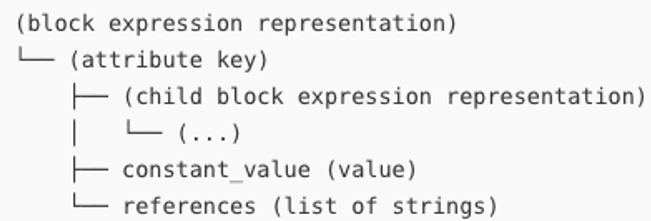

- Expressions in the `tfconfig/v2` collections are ultimately represented by `constant_value` fields or by `references` lists, depending on whether they were constant or required evaluation.
- The latter must then be cross-referenced against the `tfplan/v2` or `tfstate/v2` imports.
    - This makes the tfconfig/v2 import hard to work with if the expressions being evaluated are not constants.
- When constants are mixed with references, the constants are lost.


Data in the tfconfig/v2 import is ultimately divided between `constant_value` fields and `references` lists.


### <a name="slide126"></a>Using the tfconfig/v2 Import
- The `tfconfig/v2` import gives information about the Terraform configuration used by the run in which Sentinel policies are checked.
    - It does NOT give all information about the Terraform configuration.
    - For instance, it does not include local values.
- It can be used to restrict the configuration of module calls, variables, resources, data sources, providers, provisioners, and outputs.
- It can also be used to compare attributes of different resources even if they are computed since it can compare the expressions the code used.
- It is useful for restricting things that the other imports don't cover.
- However, using it to restrict resources and data sources can be challenging because of the need to cross-reference references.

Notes:
- Cross-referencing of references should only be done by advanced users and only when a policy cannot be implemented with the `tfplan/v2` and `tfstate/v2` imports.



- type: text
contents: We've made things easier by writing most of the policy for you and by
providing the test cases and mocks that you need to test it. The mocks simulate
the use of two Azure modules both from the public Terraform Registry and from
a Private Module Registry in an organization on the Terraform Cloud server.

- type: text
contents: |-
Your task is to complete and test a Sentinel policy that requires that all modules called by the root module come from the [Private Module Registry](https://www.terraform.io/docs/cloud/registry/index.html) (PMR) of a Terraform Cloud organization called "Cloud-Operations". You will use the [tfconfig/v2](https://www.terraform.io/docs/cloud/sentinel/import/tfconfig-v2.html) import to do that.

Since the owners of a Terraform Cloud/Enterprise organization can prevent modules in their PMR from using external modules, requiring the root module to call all modules from the PMR effectively requires that all non-root modules come from the PMR.

You might find the documentation for Sentinel's [matches](https://docs.hashicorp.com/sentinel/language/spec/#matches-operator) operator and [strings](https://docs.hashicorp.com/sentinel/imports/strings) import useful. You might also want to read about how modules are sourced from private module registries [here](https://www.terraform.io/docs/cloud/registry/using.html).

assignment: |-
### Introduction
In this challenge, you will write a fifth Sentinel policy for Terraform.

Your task is to complete and test a Sentinel policy that requires that all modules loaded by the root module come from the [Private Module Registry](https://www.terraform.io/docs/cloud/registry/index.html) (PMR) of a Terraform Cloud organization.

You'll complete a simple version of the policy in this challenge and then complete a more complex version in the next challenge.

We recommend reviewing this [doc](https://www.terraform.io/docs/cloud/registry/using.html) that describes how to specify the `source` for a module in a Private Module Registry on a Terraform Cloud or Terraform Enterprise server.

We've made things easier by writing most of the policy for you and by providing the test cases and mocks that you need to test it. The mocks simulate the use of two Azure modules.

At this point, we recommend you look at the tree diagram in the [Import Overview](https://www.terraform.io/docs/cloud/sentinel/import/tfconfig-v2.html#import-overview) for the `tfconfig/v2` import that the policy uses.

At any point while solving the challenge, you can click the green "Check" button to get a hint suggesting something that you still need to do.

### Complete the First Version

Open the "`require-modules-from-pmr-a.sentinel`" policy on the "Policies" tab. You'll see several placeholders in angular brackets throughout the policy. You need to replace those placeholders with suitable Sentinel expressions.

Note that this policy uses parameters like the "`require-even-number.sentinel`" policy did. While the `address` parameter has the default value `app.terraform.io`, the `organization` parameter does not have a default value. However, if you look at the "pass.hcl" and "fail.hcl" test case files on the "Test Cases" tab, you'll see that the value `Cloud-Operations` is assigned to the `organization` parameter in both of them.

Replace `<expression_1>` in the `require_modules_from_pmr` function with an expression that gives a list of all module calls. The `for` loop with that expression uses `index` and `mc` to represent the index and data for each of these module calls as it iterates across them. See the [module_calls](https://www.terraform.io/docs/cloud/sentinel/import/tfconfig-v2.html#the-module_calls-collection) section of the `tfconfig/v2` documentation for more details.

We only want the policy to restrict module calls made from the root module. While module calls generally have an index with the form `<module_address>:<name>`, the first part, `<module_address>:`, is ommitted for module calls made from the root module.

Accordingly, replace `<condition_1>` with a condition that requires the current module call to have an index that does not contain a colon. There are at least two ways of doing this with the [matches](https://docs.hashicorp.com/sentinel/language/spec/#matches-operator) operator:

1. The simpler way uses `if index matches "<regex1>"` in which <regex1\> uses `.+` or `(.+)` twice to match one or more characters.
2. The slightly more complex way uses `if index matches "<regex2>"` in which <regex2\> contains a [negated character class](https://www.regular-expressions.info/charclass.html) and ensures that nothing in it occurs from the beginning (^) to the end ($) of the index.

Next, you need to replace `<condition_2>` with a condition that tests if the module call has a `source` from the desired Private Module Registry. Since this condition is placed after `not`, the function will print a violation message for modules that are not in the PMR and set the `validated` flag to `false`.

While you could use the `matches` operator in your replacement of `<condition_2>`, **please use the `has_prefix` function from Sentinel's [strings](https://docs.hashicorp.com/sentinel/imports/strings) import in your solution**.

In general, a well-designed function should not reference things defined outside of it. So, please do not reference the Sentinel parameters, `address` and `organization` from the top of the policy; instead, reference the function's arguments, `tf_address` and `tf_org`.

You can use Sentinel's `+` operator to concatenate variables and strings together. In fact, you'll see a useful example in the second violation message.

Next, you need to replace `<expression_2>` with an expression that gives the source of the module in the violation message.

Now that you've completed the `require_modules_from_pmr` function, you need to call it, replacing `<function>(<arg1>, <arg2>)` with a call to the function that passes in suitable arguments to it. The result is assigned to a boolean variable, `modules_from_pmr` which is evaluated by the `main` rule. This would be a good place to use the Sentinel parameters, `address` and `organization`, defined at the top of the policy. Also, you can concatentate variables and static strings with the `+` operator.

After making all the above substitutions, save the "`require-modules-from-pmr-a.sentinel`" policy by clicking the disk icon above the file.

### Examine the Test Cases and Mocks
- Now open the test cases and mock files on the "Test Cases" tab.
    - You'll see that the "`fail.hcl`" test case refers to the "mock-tfconfig-fail.sentinel" mock file and expects the main rule to return false.
    - You'll also see that the "`pass.hcl`" test case refers to the "`mock-tfconfig-pass.sentinel`" mock file and expects the `main` rule to return `true`.

As mentioned above, both test case files provide a value for the `organization` parameter. We also could have provided a value for the `address` parameter to override the default value set in the policy. We would do that if using a Terraform Enterprise server instead of the Terraform Cloud deployment hosted by HashiCorp.

The mock files are simplified versions of mocks generated from plans of Terraform Cloud runs done against Terraform code that used the Azure provider to provision Azure resources including resource groups, network resources, security group resources, and VMs. The "`mock-tfconfig-fail.sentinel`" mock uses modules from the public [Terraform Registry](https://registry.terraform.io/) while the "mock-tfconfig-pase.sentinel" mock uses modules from a PMR in the "Cloud-Operations" organization on the Terraform Cloud server ("`app.terraform.io`").

### Test the First Version

Now, you should test your policy with this command:

In [ ]:
sentinel test -run=pmr-a.sentinel -verbose

Setting the `-run` argument to "pmr.sentinel" will only match the desired policy and avoid running other policies. Both test cases should pass with green output. Additionally, the fail test case will print messages indicating that the root module of the Terraform configuration called modules that are not from the desired private module registry.

If that is not the case, you will need to edit the "require-modules-from-pmr-a.sentinel" policy and test the policy again until both test cases pass.

In the next challenge, you will complete a second version of the policy.

## Exercise 5b

**teaser**: 
Only allow modules from the Private Module Registry (second version).

**notes**:

In this challenge, you will write a second version of the fifth Sentinel policy for Terraform.

You will also move the `require_modules_from_pmr` function you wrote in the last challenge into a module and then call it from the second version of the policy.

assignment: |-
### Introduction
In this challenge, you will write a second version of the fifth Sentinel policy for Terraform.

Your task is to complete and test a Sentinel policy that requires that all modules loaded by the root module come from the [Private Module Registry](https://www.terraform.io/docs/cloud/registry/index.html) (PMR) of a Terraform Cloud organization.

At any point while solving the challenge, you can click the green "Check" button to get a hint suggesting something that you still need to do.

### Complete the Second Version
In this challenge, we would like you to move your completed `require_modules_from_pmr` function into the file, "`module-functions.sentinel`", so that it can be called by other policies as a Sentinel module. We then want you to modify the "`require-modules-from-pmr-b.sentinel`" policy to call the function from that file.

Here are the steps you should follow:

1. Copy the entire `require_modules_from_pmr` function to the bottom of the "module-functions.sentinel" file that is in the /root/sentinel/common-functions/module-functions directory.
1. Save the "`module-functions.sentinel`" file.
1. Replace `<import_statement>` in the "`require-modules-from-pmr-b.sentinel`" policy with a suitable import statement that will allow that policy to call the function from the "`module-functions.sentinel`" file. We recommend that you look at the test cases to see the name they are using for the module that points at that file. **Please use the alias `modules`.**
1. Replace `<function_call>` with a call to the `require_modules_from_pmr` function in the module referenced by the import statement you just added. Be sure to include two suitable arguments in the function call.
1. Save the "`require-modules-from-pmr-b.sentinel`" policy.

### Examine the Test Cases and Mocks

Now open the test cases and mock files on the "Test Cases" tab. These are like the ones in the previous challenge, but both test cases also refer to the "`module-functions.sentinel`" module that you just wrote.

### Test the Second Version

Finally, test your policy with this command:

In [ ]:
sentinel test -run=pmr-b.sentinel -verbose

Both test cases should pass with green output. Additionally, the fail test case will print messages indicating that the root module of the Terraform configuration called modules that are not from the desired private module registry.

If that is not the case, you will need to edit the "`require-modules-from-pmr-b.sentinel`" policy and test the policy again until both test cases pass.

## Extra Credit

**teaser**: |
Prevent auto apply on production workspaces.

notes:
- type: text
contents: |-
In this extra credit challenge, you will use the [tfrun](https://www.terraform.io/docs/cloud/sentinel/import/tfrun.html) import to prevent production workspaces from having [Auto Apply](https://www.terraform.io/docs/cloud/workspaces/settings.html#auto-apply-and-manual-apply) enabled.

We recommend reviewing following slides from the Sentinel-for-Terraform-v4.pptx presentation.

- type: text
contents: '![Slide 127](../assets/extra-credit/slide-127.png)'
### <a name="slide127"></a>

- type: text
contents: '![Slide 128](../assets/extra-credit/slide-128.png)'
### <a name="slide128"></a>

- type: text
contents: '![Slide 129](../assets/extra-credit/slide-129.png)'
### <a name="slide129"></a>

- type: text
contents: '![Slide 130](../assets/extra-credit/slide-130.png)'
### <a name="slide130"></a>

- type: text
contents: '![Slide 131](../assets/extra-credit/slide-131.png)'
### <a name="slide131"></a>

- type: text
contents: We've made things easier by writing most of the policy for you and by
providing the test cases and mocks that you need to test it.
- type: text
contents: |-
Your task is to complete and test a Sentinel policy that prevents any workspace with a name starting with "prod-" or ending in "-prod" from having the Auto Apply property set to `true`.

You might find the documentation for Sentinel's [matches](https://docs.hashicorp.com/sentinel/language/spec/#matches-operator) operator and [strings](https://docs.hashicorp.com/sentinel/imports/strings) import useful.

assignment: |-

### Introduction

In this extra credit challenge, you will use the [tfrun](https://www.terraform.io/docs/cloud/sentinel/import/tfrun.html) import to prevent production workspaces from having [Auto Apply](https://www.terraform.io/docs/cloud/workspaces/settings.html#auto-apply-and-manual-apply) enabled.

Your task is to complete and test a Sentinel policy that prevents any workspace with a name starting with "`prod-`" or ending in "`-prod`" from having the Auto Apply property set to `true`.

We've made things easier by writing most of the policy for you and by providing the test cases and mocks that you need to test it.

At any point while solving the challenge, you can click the green "Check" button to get a hint suggesting something that you still need to do.

### Complete the Policy

Open the "`prevent-auto-apply-in-production.sentinel`" policy on the "Policies" tab. Note that it uses the `tfrun` import.

The first thing you need to do is replace `<condition_1>` and `<condition_2>` in the `validate_auto_apply` function with conditions that test if the workspace name starts with "prod-" or ends with "-prod". You will probably want to use Sentinel's [strings](https://docs.hashicorp.com/sentinel/imports/strings) import or [matches](https://docs.hashicorp.com/sentinel/language/spec/#matches-operator) operator as you have done in earlier challenges. If you use the `strings` import, be sure to declare it at the top of the policy. If you use the `matches` operator, note that the comment at the top of the policy gives you regex expressions you can use with it.

Next, you need to replace `<condition_3>` with a condition that tests if the workspace has auto apply enabled. Review the [tfrun](https://www.terraform.io/docs/cloud/sentinel/import/tfrun.html) import's documentation to figure out what to use.

You should now replace `<expression_1>` in the `validate_auto_apply` function with an expression that gives the name of the workspace.

After making all the above substitutions, save the "`prevent-auto-apply-in-production.sentinel`" policy.

### Examine the Test Cases and Mocks

Please review the test cases and mock files on the "Test Cases" tab. You'll see that there are two fail test cases and two pass test cases with corresponding mocks. These give us fail and test cases for workspace names that start with "`prod-`" and end with "`-prod`".

### Test the Policy
Finally, test your policy:

In [ ]:
sentinel test -run=auto -verbose

All 4 test cases should pass with green output. Additionally, the fail test cases will print violation warnings.

If all 4 test cases did not pass, or if Sentinel reported errors for specific lines of the policy, fix your policy and try testing it again until all 4 test cases do pass.

Congratulations on completing the Sentinel in Terraform track! This is one of the more challenging workshop tracks.  Well done, if you were able to complete all the policies.  And kudos for trying even if you struggled a bit. Perhaps you can go through it a second time and do better?

# Resources

- Internal Sentinel for Terraform Workshop - https://hashicorp.atlassian.net/wiki/spaces/SCESS/pages/2275803151/Sentinel+for+Terraform+Workshop
- https://play.instruqt.com/hashicorp/tracks/sentinel-cli-basics
- https://play.instruqt.com/hashicorp/tracks/sentinel-for-terraform-v4
- Sentinel for Terraform Workshop (v4) - https://storage.googleapis.com/instruqt-hashicorp-tracks/sentinel-shared/Sentinel-for-Terraform-v4.pptx
- David Howes Sentinel for Terraform (v4) TA Notes - https://docs.google.com/document/d/1iTeRGcf_NRHlqKd_dRpuIfZdZe7F6e8f5chEcMlSc1k/edit
- Chris Smith Sentinel v5 Workshop Cheatsheet - https://docs.google.com/spreadsheets/d/1QUDbgfWTi3_nxOwaBARHANdbfO23W9wmkwXW5HnLQIU/edit

Useful Sentinel Documentation
- Main Sentinel Docs:
    - https://docs.hashicorp.com/sentinel
    - https://docs.hashicorp.com/sentinel/language/spec
- Terraform Cloud Sentinel Docs:
    https://www.terraform.io/docs/cloud/sentinel/index.html
- GitHub Repository with Sample Sentinel Policies for AWS, Azure, GCP, and VMware as well as useful common functions in modules:
    https://github.com/hashicorp/terraform-sentinel-policies 
- Guide to Writing and Testing Sentinel Policies in Terraform:
    - [WritingAndTestingSentinelPoliciesForTerraform-v3.0.pdf](https://storage.googleapis.com/instruqt-hashicorp-tracks/sentinel-shared/WritingAndTestingSentinelPoliciesForTerraform-v3.0.pdf)


## Slides from powerpoint

### <a name="slide19"></a>19 - Types of Terraform Sentinel Policies
There are essentially four types of Terraform Sentinel policies corresponding to the 4 Terraform Sentinel imports:
1. Policies can use the `tfplan/v2` import to restrict specific attributes of specific resources and data sources in the current Terraform plan.
    - data from terraform plans
1. Policies can use the `tfconfig/v2` import to restrict the configuration of Terraform modules, variables, resources, data sources, providers, provisioners, and outputs.
    - data about terraform configuration
1. Policies can use the `tfstate/v2` import to check whether previously provisioned resources or data sources have attributes with values that are no longer allowed.
    - data about current state of a workspace
1. Policies can use the `tfrun` import to check workspace and run metadata and whether cost estimates for planned resources are within limits.
    - metadata for Terraform runs and their workspaces and cost estimate data

>-  Some policies might use more than one of these imports.
> - There is no v2 version of the simpler `tfrun` import because changes were not needed to give better compatibility with Terraform's data structures in versions 0.12 and higher.


### <a name="slide27"></a>27 - Sentinel Numerical and Logical Operators
- Arithmetic: `+`, `-`, `*`, `/`, and `%` (remainder)
- `p and q`- p and q must both be true
- `p or q` - at least one of them must be true
- `p xor q` - exactly one of them must be true
- `!p` - p is false
- `not p` - p is false


### <a name="slide28"></a>28 - Sentinel's Short-Circuit Logic
- Sentinel applies `Short-Circuit Logic` for compound boolean expressions like `p and q` and `(a and b) or c`:
- This means that Sentinel does not evaluate all conditions further to the right if it already knows the final answer.
    - So, if `p` is false, it does not evaluate `q` since `p` and `q` is already false.
    - If `a` and `b` are both true, it does not evaluate `c` since `(a and b) or c` is already true.
    - If `a` is false, it does not evaluate `b` since `a and b` is already false, but it does evaluate `c` since `(a and b) or c` could still be true or false, depending on the value of `c`.

### <a name="slide29"></a>29 - Sentinel Comparison Operators
|operator|definition|
| --- | ---| 
| `==` | equal to|
| `!=` | not equal to |
| `<` | less than |
| `<=` | less than or equal to
| `>` | greater than
| `>=` | greater than or equal to
| `is` | equal to
| `is not` | not equal to

Note that `maps` and `lists` are comparable!



- The `for` loop is always used with the `as` keyword to declare iterator variables
- When iterating over a list, only one iterator variable is used.
- When iterating over a map, two are usually used, the first for the keys and the second for the values of the map.
- If you only declare one iterator variable for a map, it will represent the values of the map.
- See https://docs.hashicorp.com/sentinel/language/loops/#for-statements

### <a name="slide31"></a>31 - The Sentinel Matches Operator

Useful regex constructs are
- "`.`" to match any single character
- "`.*`" to match 0 or more occurrences of any character
- "`.+`" to match 1 or more occurrences of any character
- "`^`" to match the beginning of a string
- "`$`" to match the end of a string
- "`[]`" to group characters
- "`^`" before a group to negate it

Special characters are escaped with "`\\`".
Note that Sentinel regex always needs "`\\`" instead of "`\`" so that Sentinel does not treat "`\`" as an escape character.
That is why the last regex example in the slide uses "`.*\\.com`" instead of the more usual "`.*\.com`".

The `matches` operator tests if a string matches a regular expression.

Examples:

|  |  |
| --- | ---- |
| `"test" matches "^te"` | # true
| `"1352" matches "[0-9]*"` | # true
| `"123A" matches "[0-9]*"` | # false
| `"xyz.com matches ".*\\.com"` | # true

The `strings` import can also be used to determine if a string has a specific prefix or suffix

### Test Policies

Use the code below to test some regex.

In [191]:
cat > policy.sentinel <<"EOF"
#import "tfplan/v2" as tfplan
hour = 4
past_midnight = rule { hour >= 0 }
before_noon   = rule { hour < 12 }
t1 = rule { "test" matches "^te" }
t2 = rule { "1352" matches "[0-9]*" }
t3 = rule { "test" matches "s^te" }
t4 = rule { "xyz.com" matches ".*\\.com" }

main = rule { 
    past_midnight and
    before_noon and
    t1 and t2 and t3 and t4
}
EOF
sentinel apply -trace policy.sentinel

No module changes to install

No policy changes to install

Execution trace. The information below will show the values of all
the rules evaluated. Note that some rules may be missing if
short-circuit logic was taken.

Note that for collection types and long strings, output may be
truncated; re-run "sentinel apply" with the -json flag to see the
full contents of these values.

Fail - policy.sentinel

policy.sentinel:10:1 - Rule "main"
  Value:
    false

policy.sentinel:4:1 - Rule "before_noon"
  Value:
    true

policy.sentinel:3:1 - Rule "past_midnight"
  Value:
    true

policy.sentinel:5:1 - Rule "t1"
  Value:
    true

policy.sentinel:6:1 - Rule "t2"
  Value:
    true

policy.sentinel:7:1 - Rule "t3"
  Value:
    false



: 1

### <a name="slide37"></a>37 - The Sentinel If/Else Conditional

This example tests if `v` is defined and equal to `value`:
```ruby
if v else null is null { 
  print("The value", v, "was null or not defined")
} else if v is not value {
  print(v, "is not equal to the required value", value)
} else {
  print(v, "is the desired value", value)
}
```

### <a name="slide41"></a>41 - Sentinel Functions
A Sentinel function is declared with the `func` keyword.
```ruby
find_resources = func(resource_type) {
  # Do something and use the parameter
  return true
}
```

- Each function has a name such as `find_resources`.
- Each function can have zero or more parameters.
    - The function above has the single parameter, `resource_type`
- Every function must return a value such as `true`.
- A call to this function could look like:
```ruby
s3_buckets = find_resources("aws_s3_bucket")
```

See https://docs.hashicorp.com/sentinel/language/functions for more details.

### <a name="slide95"></a>95 - Checking for Missing Expressions
An expression can fail to exist in multiple ways:
- It could be absent from the data which gives `undefined`.
- It could be set to `null` or the empty string (`""`).
- It could be an empty map `{}`, or an empty list `[]`.

Verify an expression is not `undefined`, `null`, or `""`:
```go
x else null not in [null, ""]
```

Verify an expression is not `undefined`, `null` or an empty map, list, or string:
```
not ( (x else null is null) or (types.type_of(x) in ["map", "list", "string"] and length(x) is 0) )
```

The `length()` function can only be applied to strings, maps, and lists, so the type of an expression should be checked before using it.



- Using `x else null not in [null, ""]` checks that an attribute is not undefined, null, or an empty string ("").  If x is missing, it will be undefined, but the else operator will convert it to null. So, we don't include undefined in the list.
- You could use `x else "" not in [null, ""]` to achieve the same result.
- Using `x else null is not null` lets you check that an attribute is neither `undefined` nor `null` but it does not prevent `""`.
- Using `x else "" is not ""` lets you check that an attribute is neither `undefined` nor the empty string, `""`, but it does not prevent `null`.
- Which expression you use depends on what values the attribute you are testing could have; some will have `null` (especially with Terraform 0.12 and higher) while others might have `""`. So, using these simplified conditions is ok when you know what to expect.
- The order of conditions in compound expressions is important to avoid errors. In the last compound condition, if `x` is `undefined`, the first condition inside `not (...)` converts it to `null`, making the first condition `true`. And if the first expression is `true` (because `x` is `null` or `undefined`), Sentinel's short-circuit logic prevents the rest of the conditions inside `not(...)` from being evaluated, so we don't have to worry about `undefined` or `null` in them. (Note that `length(null)` gives `undefined` and would cause an error without short-circuit logic.) 
- The expression `types.type_of(null)` gives "`null`", so passing `null` to it would be ok, but `types.type_of(undefined)` gives `undefined` and would also cause an error without short-circuit logic.
